# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

After taking Machine learning deployment course, you will able to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the ***Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU


# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model

## #Importing Modules and Predefined Functions#

In [24]:
from sklearn.cluster import KMeans          # Import KMeans for clustering

In [2]:
# Data manipulation and analysis

import pandas as pd      # pandas: dataframes, loading CSV
import numpy as np       # numpy: numerical operations

# Visualization
import matplotlib.pyplot as plt   # matplotlib: plotting
import seaborn as sns             # seaborn: statistical plots

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score, average_precision_score, f1_score, precision_score, recall_score, accuracy_score)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans          # Import KMeans for clustering
from sklearn.neighbors import KNeighborsClassifier, 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier   # XGBoost: powerful gradient boosting

# Deep Learning
import tensorflow as tf
from tensorflow import keras

# Model saving/loading
import joblib

# Data Integrity & Validation
from deepchecks.tabular import Dataset
from deepchecks.tabular.suites import data_integrity, train_test_validation, model_evaluation

# Misc
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


/Users/zaferyildirim/data1/lib/python3.10/site-packages/deepchecks/core/serialization/dataframe/html.py:16: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.



## 1. Exploratory Data Analysis

### 1.1. Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [5]:
# Load dataset
df = pd.read_csv('HR_Dataset.csv')  # Replace with your actual path if needed

# Show sample rows
df.sample(10)

# Show info: shape, column types
print(df.info())

# Check for duplicates
dup_rate = df.duplicated().mean()
print(f"Duplicate row rate: {dup_rate:.2%}")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
Duplicate row rate: 20.05%
Missing values per column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accide

In [6]:
# Show sample rows
df.sample(10)

satisfaction_level  last_evaluation  number_project  \
8600                 0.53             0.51               4   
10139                0.85             0.77               4   
12490                0.53             0.56               4   
14407                0.27             0.54               7   
14680                0.41             0.52               2   
14240                0.38             0.50               2   
3816                 0.70             0.87               5   
5052                 0.70             0.76               5   
2705                 0.65             0.86               4   
1156                 0.40             0.51               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
8600                    181                   3              0     0   
10139                   264                   3              0     0   
12490                   281                   6              0     1   
14407                   278                   3              0     1   
14680                   159                   3              0     1   
14240                   132                   3              0     1   
3816                    177                   2              0     0   
5052                    165                   3              0     0   
2705                    264                   2              1     0   
1156                    156                   3              0     1   

       promotion_last_5years Departments   salary  
8600                       0      support     low  
10139                      0           IT     low  
12490                      0           hr  medium  
14407                      0    technical     low  
14680                      0        sales     low  
14240                      0   accounting     low  
3816                       0   accounting  medium  
5052                       0        sales  medium  
2705                       0           hr     low  
1156                       0        sales  medium

In [10]:
# Standardize column names (lowercase, strip spaces)
df.columns = df.columns.str.strip().str.lower()

# Remove duplicates for clean modeling
df = df.drop_duplicates(keep='first').reset_index(drop=True)

# Move 'left' to last column for consistency
if 'left' in df.columns:
    df['left'] = df.pop('left')

# Run Deepchecks data integrity suite (after cleaning)
ds = Dataset(df, label='left', cat_features=['departments', 'salary'])
integ_suite = data_integrity(n_samples=len(df))
suite_result = integ_suite.run(ds)
suite_result.show()  # Interactive report

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_48PYLHYQQG8H13GZEEIXCXB6U">Data Integrity Sui…

In [5]:

# Lowercase (and trim any stray spaces, just in case)
df.columns = df.columns.str.strip().str.lower()

# sanity check
print(df.columns.tolist())


['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'departments', 'salary', 'left']


In [11]:
df.describe()
# Outlier values can deteriorate the clustering quality.
# We should be careful about outliers in clustering algorithms.

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  work_accident  \
count          11991.000000        11991.000000   11991.000000   
mean             200.473522            3.364857       0.154282   
std               48.727813            1.330240       0.361234   
min               96.000000            2.000000       0.000000   
25%              157.000000            3.000000       0.000000   
50%              200.000000            3.000000       0.000000   
75%              243.000000            4.000000       0.000000   
max              310.000000           10.000000       1.000000   

       promotion_last_5years          left  
count           11991.000000  11991.000000  
mean                0.016929      0.166041  
std                 0.129012      0.372133  
min                 0.000000      0.000000  
25%                 0.000000      0.000000  
50%                 0.000000      0.000000  
75%                 0.000000      0.000000  
max                 1.000000      1.000000

satisfaction_level  last_evaluation  number_project  \
1032                 0.10             0.86               6   
11574                0.60             0.98               4   
4591                 0.71             0.68               4   
1977                 0.84             0.82               5   
6634                 0.81             0.59               4   
11619                0.57             0.75               4   
7576                 0.74             0.90               3   
1577                 0.73             0.91               4   
5583                 0.49             0.99               3   
8754                 0.99             0.62               4   

       average_montly_hours  time_spend_company  work_accident  \
1032                    266                   4              1   
11574                   146                  10              0   
4591                    228                   2              0   
1977                    240                   5              0   
6634                    187                   2              0   
11619                   249                  10              0   
7576                    285                   3              0   
1577                    247                   5              0   
5583                    199                   3              0   
8754                    256                   2              0   

       promotion_last_5years  departments  salary  left  
1032                       0    technical     low     1  
11574                      0    technical     low     0  
4591                       0        sales     low     0  
1977                       0   accounting  medium     1  
6634                       0    technical     low     0  
11619                      0  product_mng  medium     0  
7576                       0   accounting     low     0  
1577                       0      support  medium     1  
5583                       0        sales  medium     0  
8754                       0           IT  medium     0

In [13]:
len(df)

11991

In [17]:
# Map department labels to consistent names
dept_map = {
    'IT': 'IT', 'ResDev': 'RandD', 'accounting': 'Accounting', 'hr': 'HR',
    'management': 'Management', 'marketing': 'Marketing', 'product_mng': 'Product_mng',
    'sales': 'Sales', 'support': 'Support', 'technical': 'Technical'
}
df['departments'] = df['departments'].replace(dept_map)

# Ensure categorical columns are correct dtype
df['departments'] = df['departments'].astype('category')
df['salary'] = df['salary'].astype('category')
df['left'] = df['left'].astype(int)

# List columns for encoding/scaling
cont_cols = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
bin_cols  = ['work_accident','promotion_last_5years']
cat_cols  = ['departments','salary']

# No repeated encoding/scaling: handled in pipeline later


In [18]:
for col in ['departments', 'salary']:
    print(col, sorted(df[col].dropna().unique().tolist()))

departments ['Accounting', 'HR', 'IT', 'Management', 'Marketing', 'Product_mng', 'RandD', 'Sales', 'Support', 'Technical']
salary ['high', 'low', 'medium']


## 2. Data Visualization

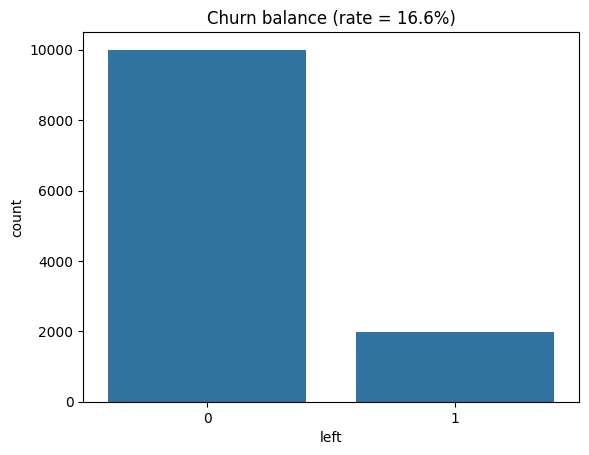

In [19]:
# Target imbalance visualization
fig, ax = plt.subplots()
sns.countplot(x='left', data=df, ax=ax)
ax.set_title(f"Churn balance (rate = {df['left'].mean():.1%})")
plt.show()


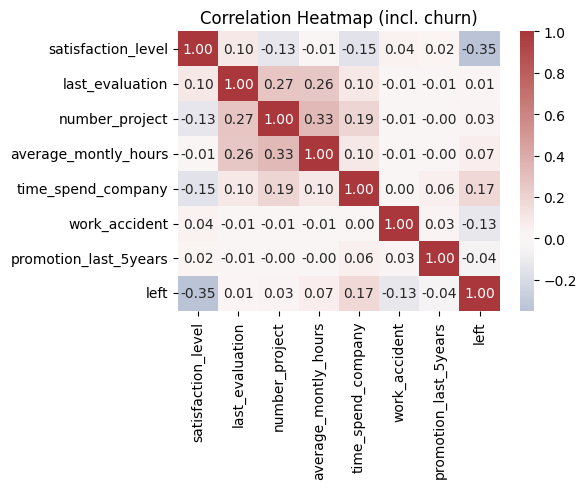

In [20]:
# Correlation heatmap (numeric + target)
num_for_corr = cont_cols + bin_cols + ['left']
corr = df[num_for_corr].corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation Heatmap (incl. churn)")
plt.tight_layout()
plt.show()


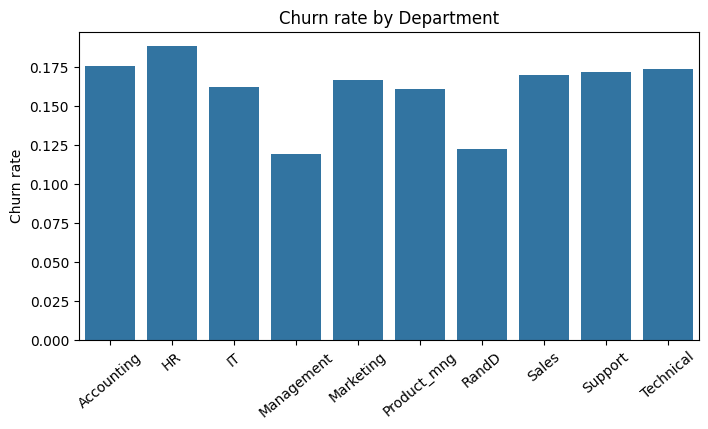

In [21]:
# Churn rate by department and salary
fig, ax = plt.subplots(figsize=(8,4))
dept_rate = df.groupby('departments')['left'].mean().sort_values(ascending=False)
sns.barplot(x=dept_rate.index, y=dept_rate.values, ax=ax)
ax.set_title("Churn rate by Department"); ax.set_ylabel("Churn rate"); ax.set_xlabel("")
ax.tick_params(axis='x', rotation=40)
plt.show()

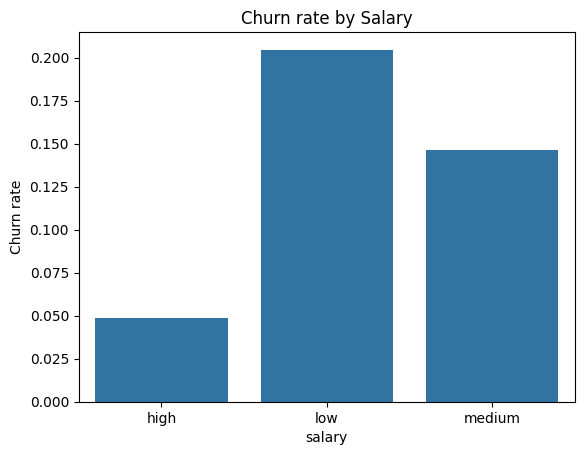

In [22]:
fig, ax = plt.subplots()
sal_rate = df.groupby('salary')['left'].mean()
sns.barplot(x=sal_rate.index, y=sal_rate.values, ax=ax)
ax.set_title("Churn rate by Salary"); ax.set_ylabel("Churn rate")
plt.show()

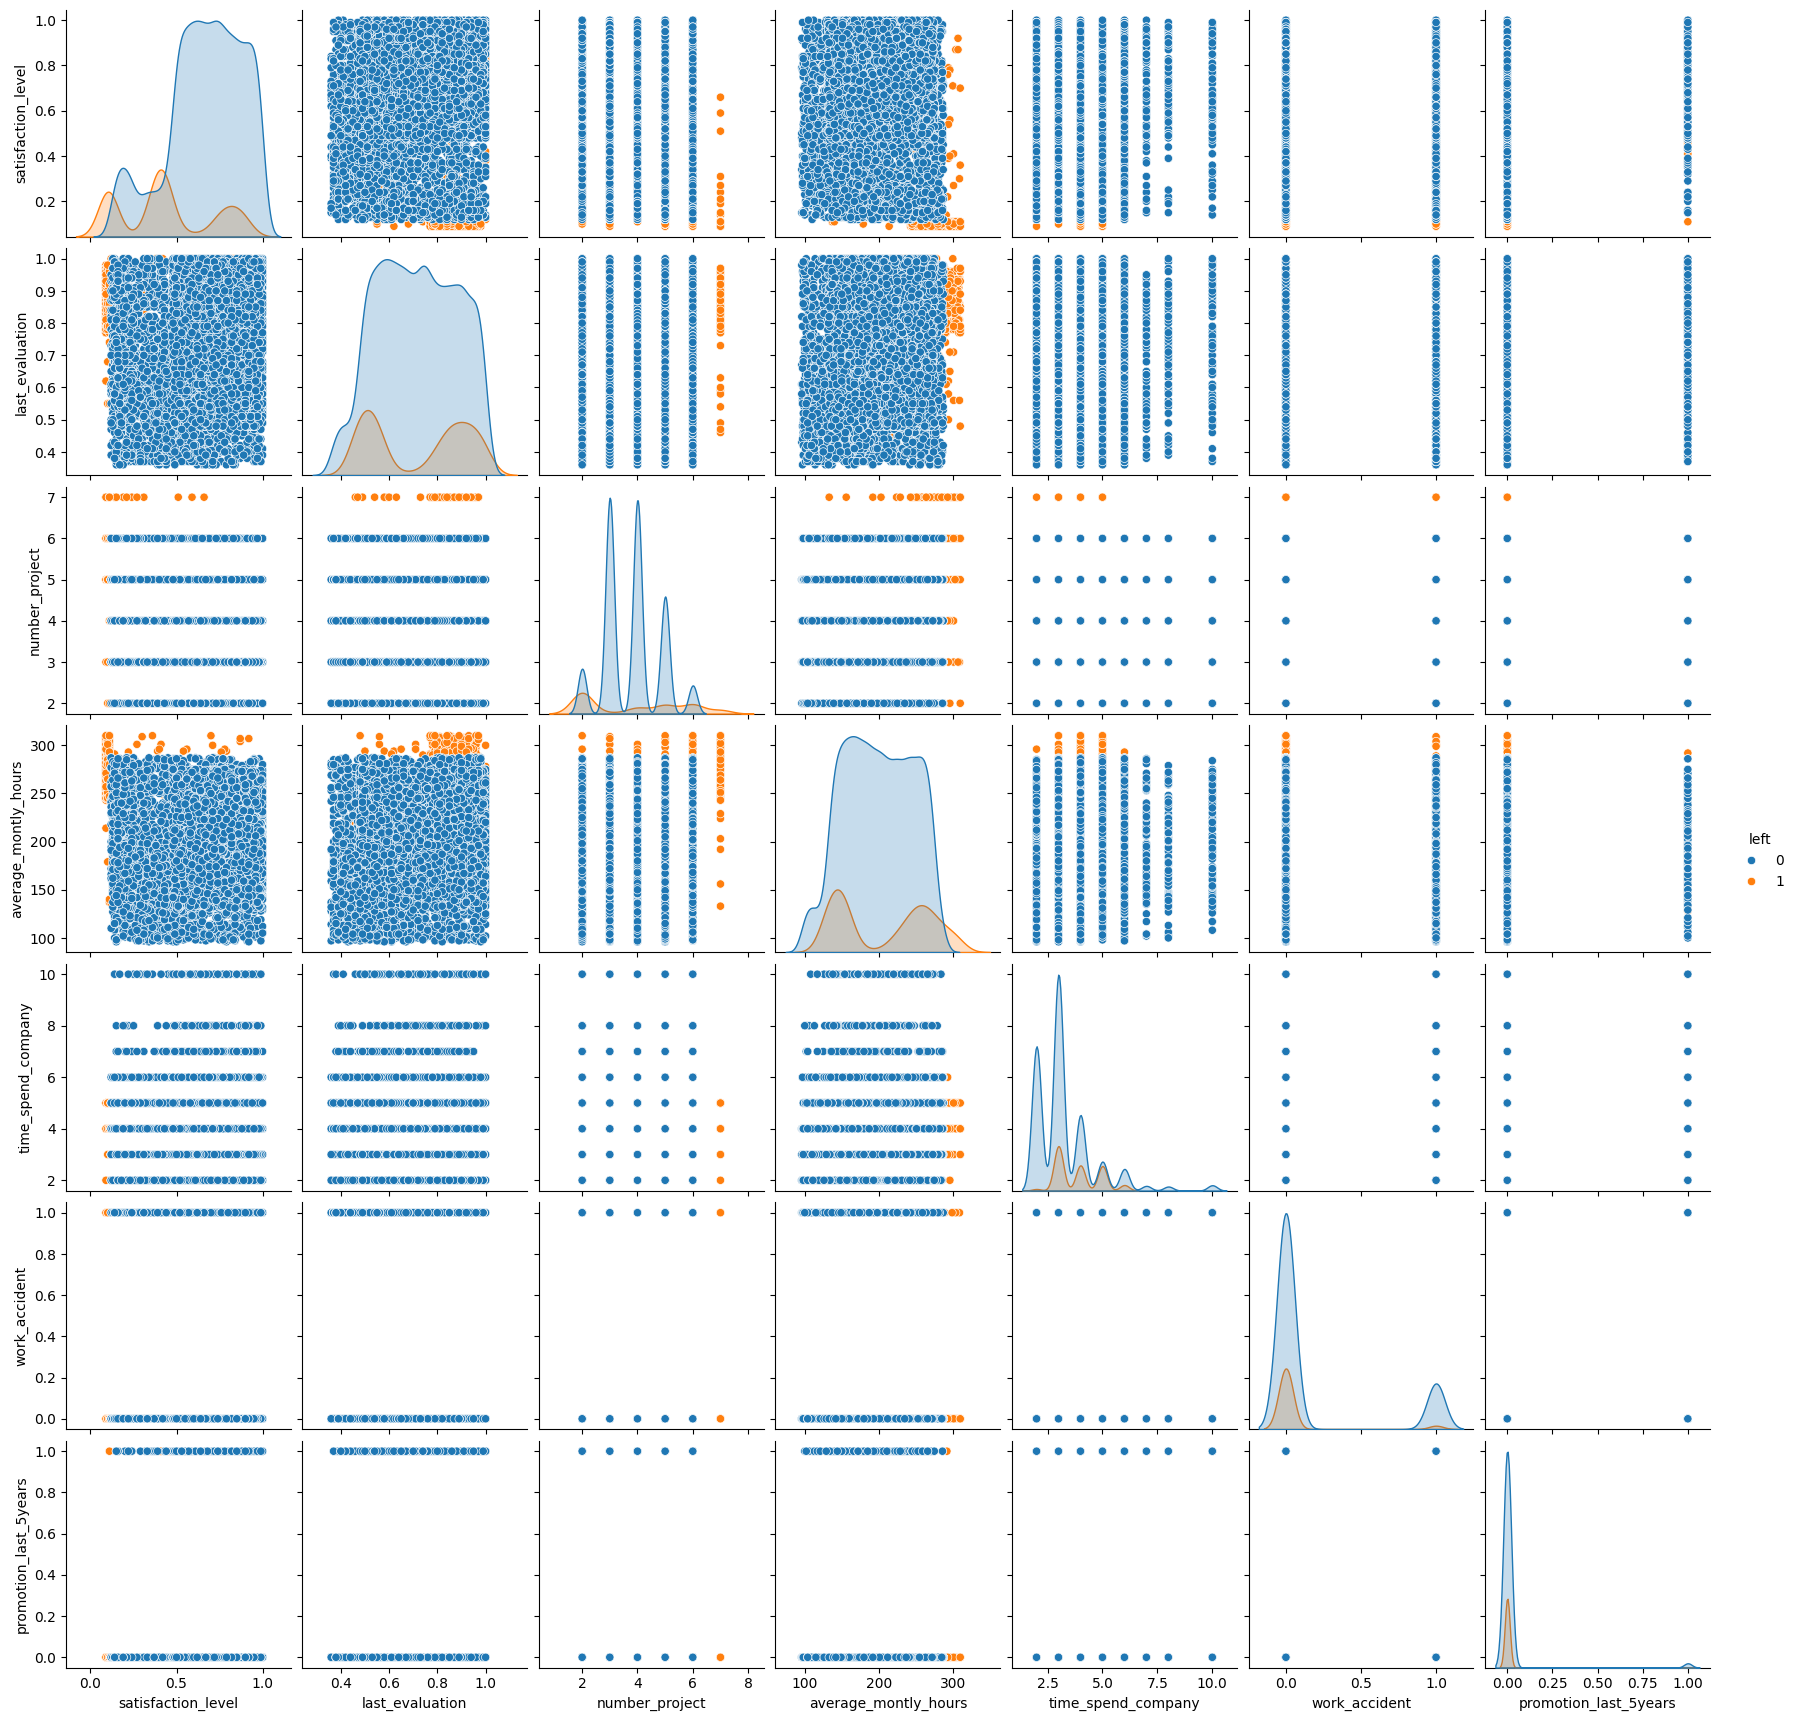

In [114]:
sns.pairplot(df, hue="left" )
plt.show()


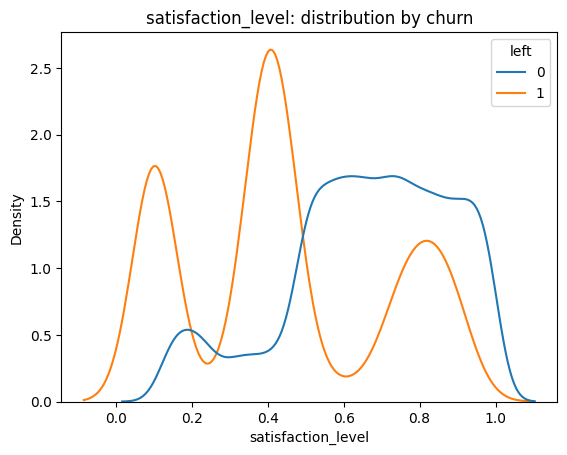

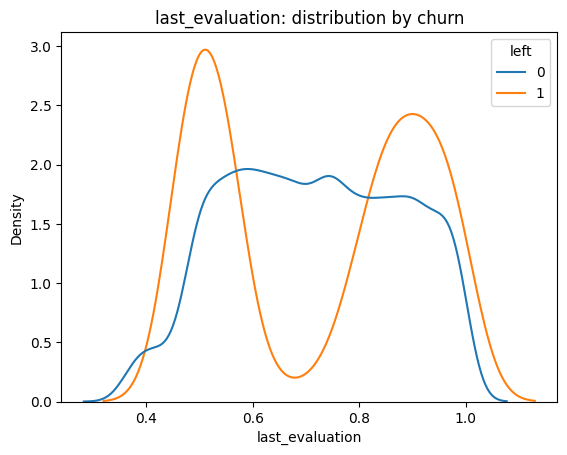

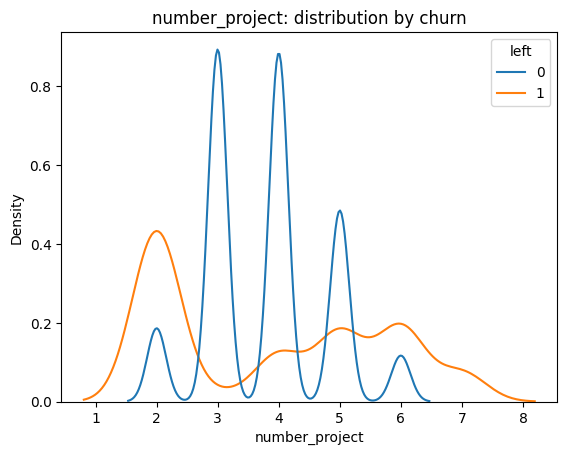

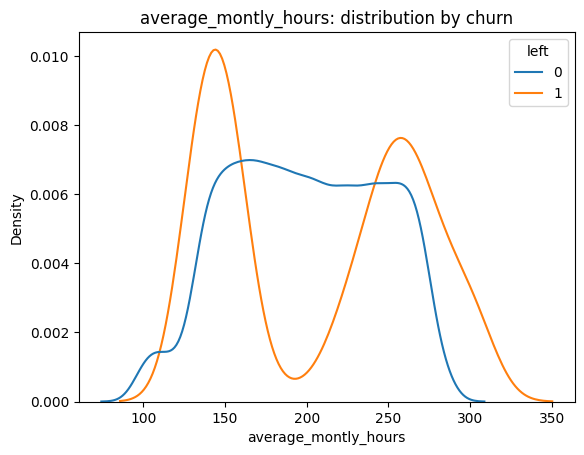

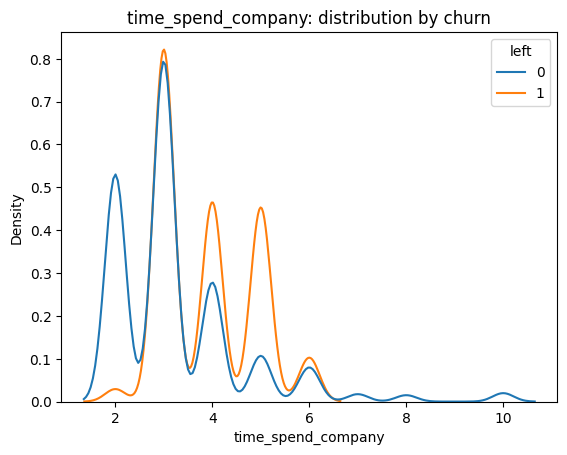

In [119]:
num_cols = ['satisfaction_level','last_evaluation','number_project',
            'average_montly_hours','time_spend_company']
for c in num_cols:
    fig, ax = plt.subplots()
    sns.kdeplot(data=df, x=c, hue='left', common_norm=False, ax=ax)
    ax.set_title(f"{c}: distribution by churn")

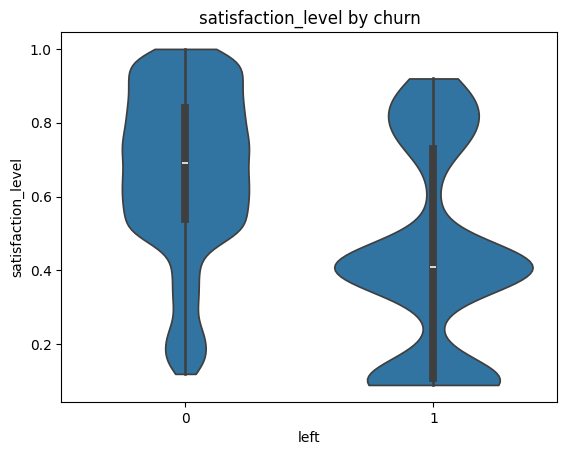

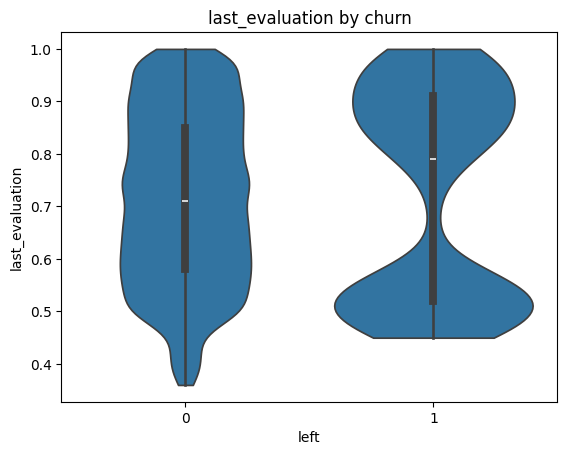

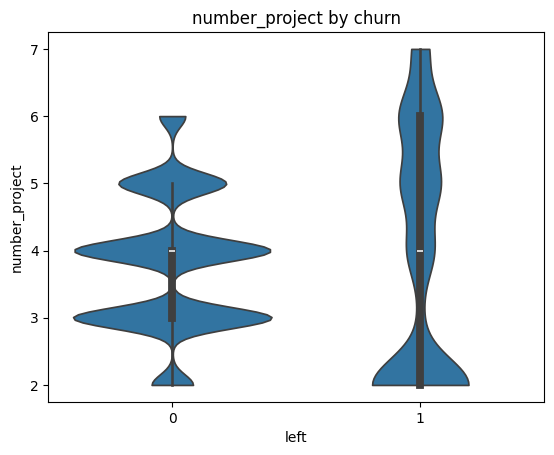

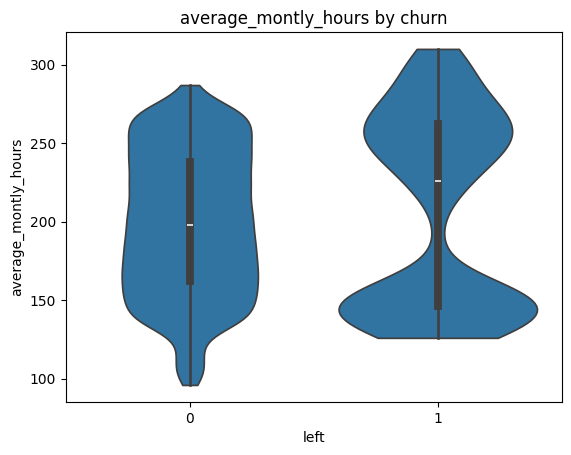

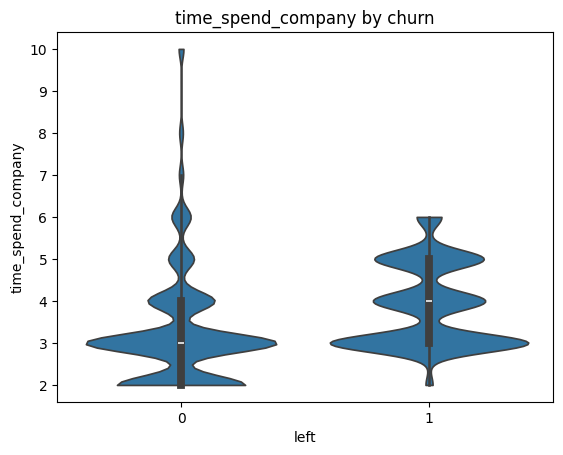

In [120]:
for c in num_cols:
    fig, ax = plt.subplots()
    sns.violinplot(data=df, x='left', y=c, cut=0, ax=ax)
    ax.set_title(f"{c} by churn")

## 3. Cluster Analysis
- Try to find hidden patterns in data with the help of unsupervised learning algorithms.
- Don't try to use clustering algoritms for classfication.

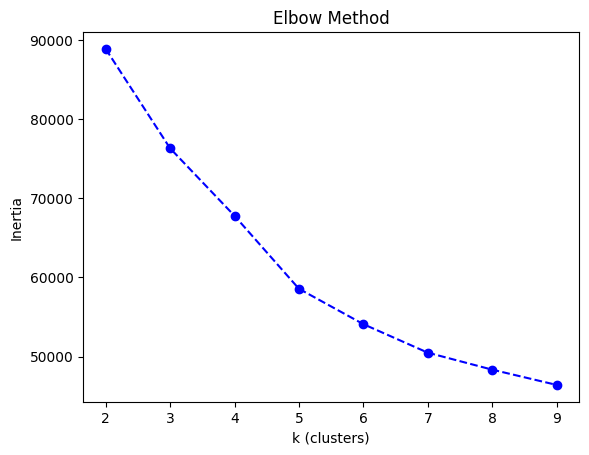

In [25]:
# Preprocessing for clustering (scaling + OHE)
preprocess = ColumnTransformer([
    ('num', StandardScaler(), cont_cols + bin_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])
X_clust = preprocess.fit_transform(df[cont_cols + bin_cols + cat_cols])

# Elbow method for optimal clusters
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_clust)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("k (clusters)"); plt.ylabel("Inertia"); plt.title("Elbow Method")
plt.show()



In [26]:
# Silhouette scores
from sklearn.metrics import silhouette_score
for num_clusters in range(2,6):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_clust)
    sil_score = silhouette_score(X_clust, kmeans.labels_)
    print(f"n_clusters={num_clusters}, silhouette score={sil_score:.3f}")



n_clusters=2, silhouette score=0.576
n_clusters=3, silhouette score=0.181
n_clusters=4, silhouette score=0.147
n_clusters=5, silhouette score=0.179


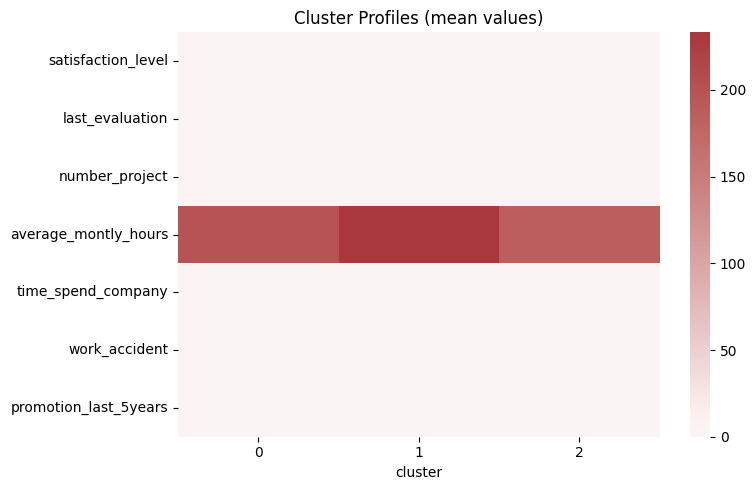

In [27]:
# Choose optimal k (e.g., 3)
k_opt = 3
model_kmeans = KMeans(n_clusters=k_opt, random_state=42)
clusters = model_kmeans.fit_predict(X_clust)
df['cluster'] = clusters

# Analyze cluster profiles
clus_mean = df.groupby('cluster')[cont_cols + bin_cols].mean().T
plt.figure(figsize=(8,5))
sns.heatmap(clus_mean, cmap="vlag", center=0)
plt.title("Cluster Profiles (mean values)")
plt.tight_layout()
plt.show()

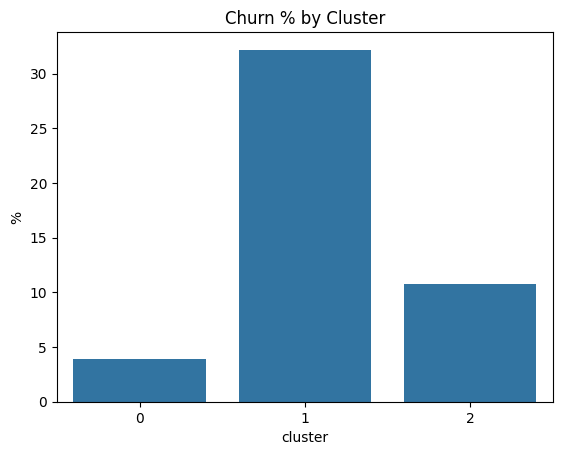

In [28]:

# Churn rate by cluster
cr = df.groupby('cluster')['left'].mean()*100
sns.barplot(x=cr.index, y=cr.values)
plt.title("Churn % by Cluster"); plt.ylabel("%")
plt.show()

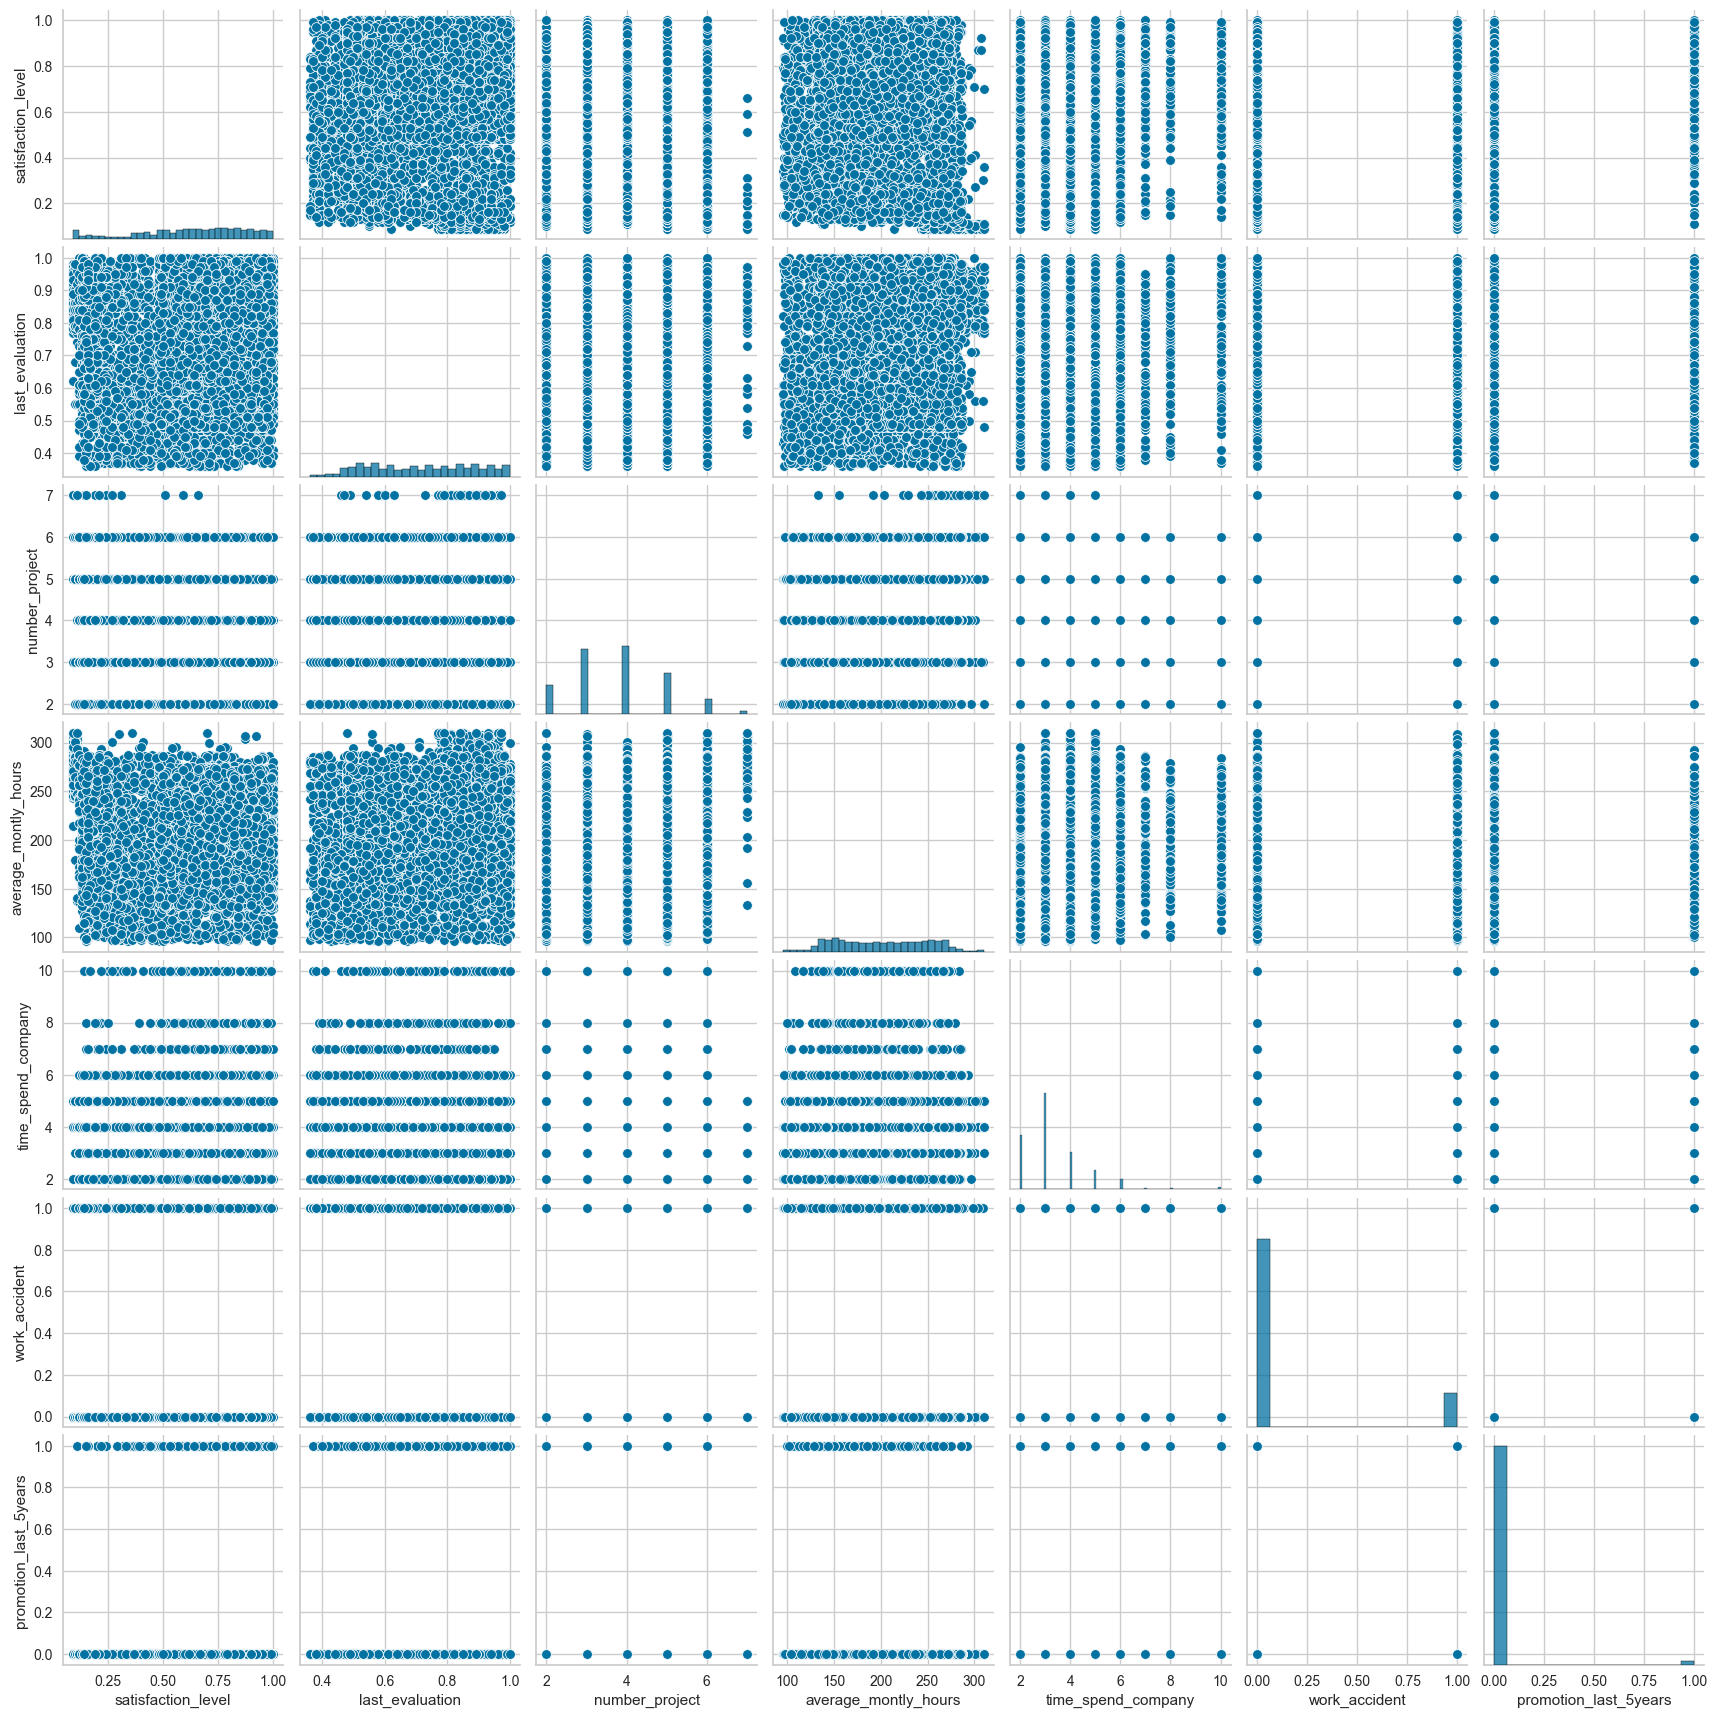

In [262]:
sns.pairplot(df[cont_cols + bin_cols])
plt.show()



In [125]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

target = 'left'
cont_cols = ['satisfaction_level','last_evaluation','number_project',
             'average_montly_hours','time_spend_company']
bin_cols  = ['work_accident','promotion_last_5years']
cat_cols  = ['departments','salary']

X = df[cont_cols + bin_cols + cat_cols].copy()

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_cols + bin_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)
Xt = preprocess.fit_transform(X)   # matrix ready for clustering

In [228]:

from sklearn.cluster import KMeans

K_means_model = KMeans(n_init=50, n_clusters=2, init='k-means++', random_state=42)


# n_clusters=.        8 (default)
# n_init :            we specify how many times to randomly assign centroids
# init='k-means++' : (assigns centroids randomly) With 'k-means++' we call the algorithm to
# randomly assign centroids, but start by assigning centroids to places where data is dense.
# max_iter=300 -->    in large data, there may be a need to increase this.
# random_state:      so that our clusters are the same. Here we fix the random_state
# so that a cluster that the sameness calls 1 does not say 0 the next time.

In [229]:
K_means_model.fit_predict(Xt)
# fit--> algorithm detects patterns here (5 clusters) + predictions 

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [230]:
K_means_model.labels_

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [40]:
# Function to compute Hopkins statistic for cluster tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

def hopkins(X, ratio=0.05):
    """
    Compute Hopkins statistic for the dataset X (numpy array or DataFrame).
    Values close to 1 indicate cluster tendency; ~0.5 means random/unclustered.
    """
    if not isinstance(X, np.ndarray):
        X = X.values  # Convert DataFrame to numpy array
    n, d = X.shape
    sample_size = max(1, int(n * ratio))

    # Uniform random sample in the data space
    X_uniform = uniform(np.min(X, axis=0), np.max(X, axis=0), (sample_size, d))

    # Random sample from original data
    random_indices = sample(range(n), sample_size)
    X_sample = X[random_indices]

    # Nearest neighbors search
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)

    # Distances from uniform random sample
    u_distances = nbrs.kneighbors(X_uniform, n_neighbors=2)[0][:, 0]

    # Distances from data sample (second nearest neighbor)
    w_distances = nbrs.kneighbors(X_sample, n_neighbors=2)[0][:, 1]

    H = np.sum(u_distances) / (np.sum(u_distances) + np.sum(w_distances))
    return H  # Hopkins statistic

In [42]:
X_clust.shape

(11991, 20)

In [44]:
hopkins(X_clust, 0.05)

# We can say that hopkins 1 is data suiatable for clustering.
# If the data were too large,
# we could also specify a sampling_size 1 for the small data sets.
# The reason for different results each time it is run;
# is that it receives random observations from X in the background.



0.8432085964160719

In [45]:
hopkins(X_clust, 0.5)

0.8371740709505786

In [46]:
hopkins(X_clust, 1)

0.8381628469314233

# Optimal cluster 

In [246]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(Xt)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Xt, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5759148980097303
For n_clusters=3, the silhouette score is 0.1805649685835174
For n_clusters=4, the silhouette score is 0.14689746690127817
For n_clusters=5, the silhouette score is 0.1792528229032414
For n_clusters=6, the silhouette score is 0.18933965885094856
For n_clusters=7, the silhouette score is 0.16917256294567762
For n_clusters=8, the silhouette score is 0.16511341365581197


In [ ]:
# n_clusters=2 on silhouette score high BUT;
# If I choose the number of clusters as 2, the inertia value is very high,
# so my clusters will spread over a large area.
# So we make a decision by comparing silhouette scores between n_clusters=3
# and n_clusters=4. The silhouette score calculated here is the average
# of all observations (according to clusters)


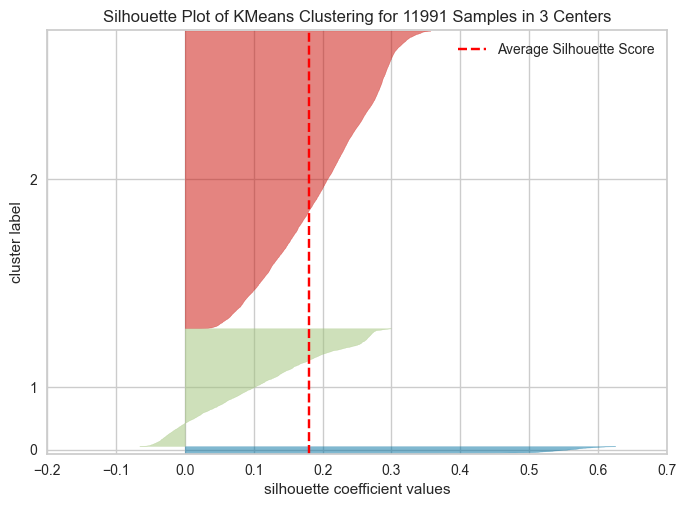

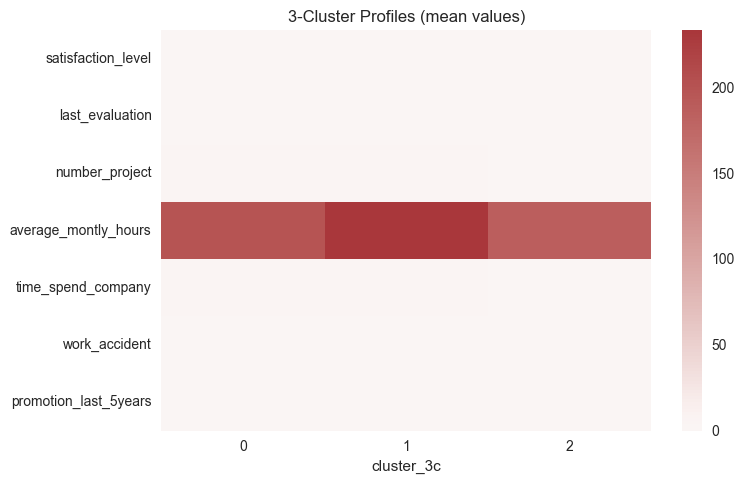

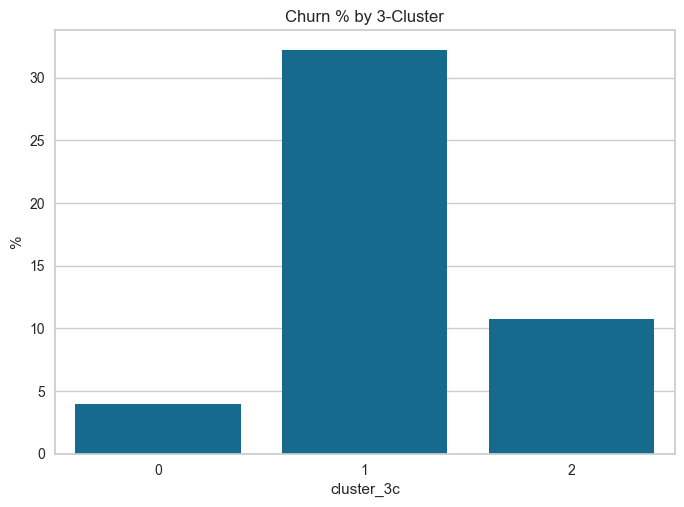

In [56]:
# --- 3-cluster analysis and visualization ---

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Fit KMeans with 3 clusters (chosen from elbow/silhouette)
model_3c = KMeans(n_clusters=3, random_state=42)
clusters_3c = model_3c.fit_predict(X_clust)
df['cluster_3c'] = clusters_3c  # Save cluster labels

# Silhouette visualization for 3 clusters
visualizer = SilhouetteVisualizer(model_3c, colors='yellowbrick')
visualizer.fit(X_clust)
visualizer.show()

# Analyze cluster profiles (mean values of features per cluster)
clus3c_mean = df.groupby('cluster_3c')[cont_cols + bin_cols].mean().T
plt.figure(figsize=(8,5))
sns.heatmap(clus3c_mean, cmap="vlag", center=0)
plt.title("3-Cluster Profiles (mean values)")
plt.tight_layout()
plt.show()

# Churn rate by cluster (3 clusters)
cr3c = df.groupby('cluster_3c')['left'].mean() * 100
sns.barplot(x=cr3c.index, y=cr3c.values)
plt.title("Churn % by 3-Cluster"); plt.ylabel("%")
plt.show()

In [57]:
from sklearn.metrics import adjusted_rand_score

# Compare predicted clusters to actual churn labels
score = adjusted_rand_score(df['cluster'], df['left'])
print(f"Adjusted Rand Score (clusters vs. churn): {score:.3f}")

Adjusted Rand Score (clusters vs. churn): 0.128


Churn rate by cluster (%):
cluster
0     3.940887
1    32.175995
2    10.749378
Name: left, dtype: float64


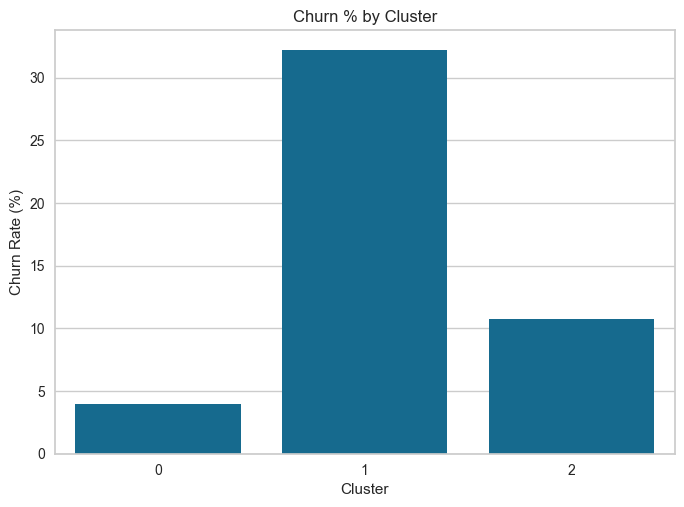

In [58]:
# --- Cluster and churn analysis ---

# 1. Churn rate by cluster
cr = df.groupby('cluster')['left'].mean() * 100
print("Churn rate by cluster (%):")
print(cr)
sns.barplot(x=cr.index, y=cr.values)
plt.title("Churn % by Cluster")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Cluster")
plt.show()



Churn rate by department (%):
departments
HR             18.801997
Accounting     17.552335
Technical      17.379679
Support        17.133443
Sales          16.980550
Marketing      16.641902
IT             16.188525
Product_mng    16.034985
RandD          12.247839
Management     11.926606
Name: left, dtype: float64


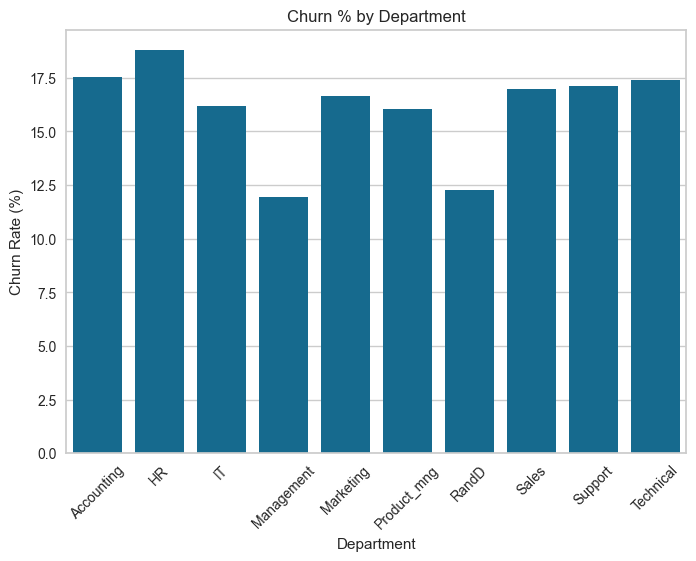

In [59]:

# 2. Churn rate by department
dept_cr = df.groupby('departments')['left'].mean() * 100
print("\nChurn rate by department (%):")
print(dept_cr.sort_values(ascending=False))
sns.barplot(x=dept_cr.index, y=dept_cr.values)
plt.title("Churn % by Department")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()




Churn rate by cluster and department (%):
cluster               0          1          2
departments                                  
Accounting     0.000000  32.432432  11.502347
HR             0.000000  34.693878  13.995485
IT           100.000000  31.111111  10.227273
Management     2.777778  18.543046   9.236948
Marketing      0.000000  31.284916  11.991435
Product_mng         NaN  30.687831  10.462777
RandD          0.000000  26.562500   7.068607
Sales          5.172414  30.903156  11.626879
Support        6.250000  36.288660  10.227273
Technical      4.545455  36.378205  10.137672


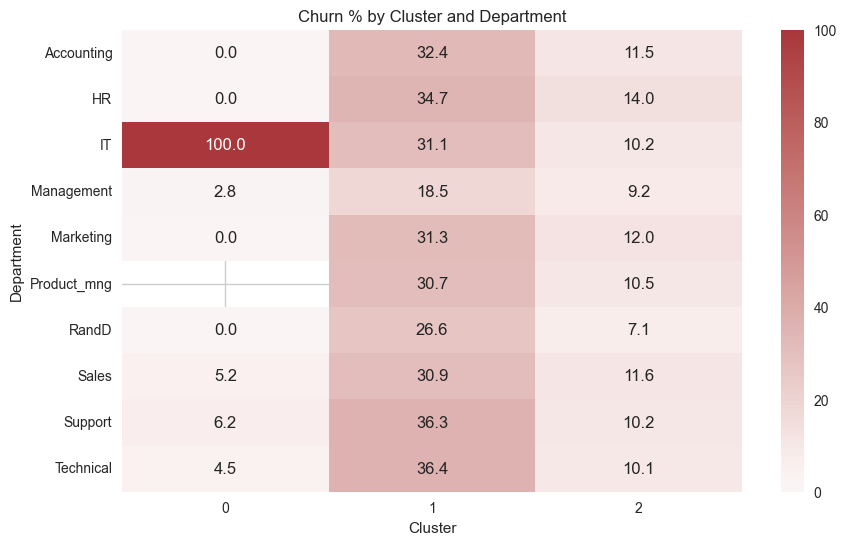

In [60]:
# 3. Churn rate by cluster and department (heatmap)
pivot = df.pivot_table(index='departments', columns='cluster', values='left', aggfunc='mean') * 100
print("\nChurn rate by cluster and department (%):")
print(pivot)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="vlag", center=0)
plt.title("Churn % by Cluster and Department")
plt.ylabel("Department")
plt.xlabel("Cluster")
plt.show()


In [61]:
# 4. Cluster sizes and churn
cluster_sizes = df['cluster'].value_counts().sort_index()
print("\nCluster sizes:")
print(cluster_sizes)
for c in cluster_sizes.index:
    rate = cr[c]
    print(f"Cluster {c}: {cluster_sizes[c]} employees, churn rate = {rate:.1f}%")




Cluster sizes:
cluster
0     203
1    3341
2    8447
Name: count, dtype: int64
Cluster 0: 203 employees, churn rate = 3.9%
Cluster 1: 3341 employees, churn rate = 32.2%
Cluster 2: 8447 employees, churn rate = 10.7%


In [63]:
# 5. Adjusted Rand Score: how well clusters match churn label
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(df['cluster'], df['left'])
print(f"\nAdjusted Rand Score (clusters vs. churn): {ars:.3f}")
# Closer to 1 means clusters align with churn label, near 0 means little alignment.




Adjusted Rand Score (clusters vs. churn): 0.128


In [62]:
# 6. Example insight: which cluster has highest churn, which department is most at risk?
max_churn_cluster = cr.idxmax()
max_churn_rate = cr.max()
max_churn_dept = dept_cr.idxmax()
max_churn_dept_rate = dept_cr.max()
print(f"\nHighest churn cluster: {max_churn_cluster} ({max_churn_rate:.1f}%)")
print(f"Department with highest churn: {max_churn_dept} ({max_churn_dept_rate:.1f}%)")



Highest churn cluster: 1 (32.2%)
Department with highest churn: HR (18.8%)


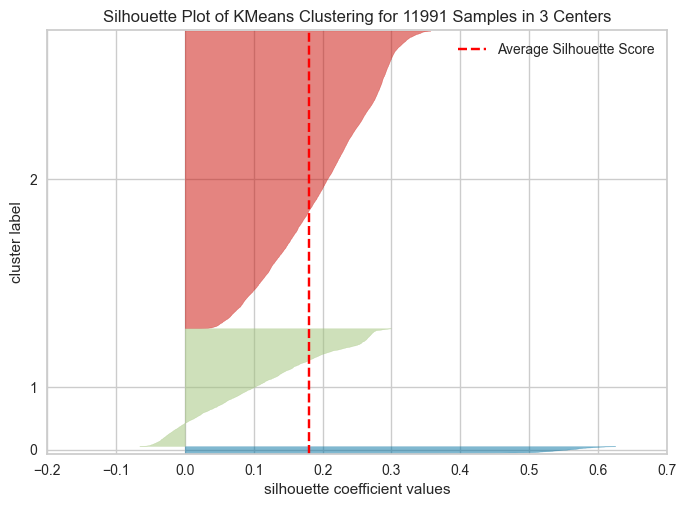

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11991 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
# Visualize silhouette scores for each cluster using Yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Fit KMeans with 3 clusters (as decided above)
model_3c = KMeans(n_clusters=3, random_state=42)

# Yellowbrick visualizer for silhouette analysis
visualizer = SilhouetteVisualizer(model_3c, colors='yellowbrick')

visualizer.fit(X_clust)    # Fit the preprocessed clustering data
visualizer.show()          # Display the silhouette plot

# This plot shows the silhouette score for each sample and cluster.
# The width of each bar corresponds to the number of observations in each cluster.

In [48]:
model_3c.labels_

array([2, 1, 1, ..., 0, 0, 2], dtype=int32)

In [49]:
visualizer.silhouette_samples_
# We can see the individual silhouette scores of the observations.

array([0.2879521 , 0.21431642, 0.27153209, ..., 0.41314254, 0.39732951,
       0.16383469])

In [51]:
labels_0 = (model3c.labels_ == 0)


NameError: name 'model3c' is not defined

In [258]:
visualizer.silhouette_samples_[labels_1] # silhoutte scores of 1 classes

array([0.1692751 , 0.14583505, 0.14790385, ..., 0.2401083 , 0.0774591 ,
       0.16383469])

In [259]:
mean_silhoutte_score_1 = visualizer.silhouette_samples_[labels_0].mean()
mean_silhoutte_score_1

0.5399820561764941

In [52]:
## Let's do same thing above for all classes:
for i in range(3):
    label = (model_3c.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5399820561764941
mean silhouette score for label 1    : 0.10659501664234745
mean silhouette score for label 2    : 0.2011843530577774
mean silhouette score for all labels : 0.1805649685835174


In [54]:
model_for_3 = KMeans(n_init=50, n_clusters=3, init='k-means++', random_state=42)
model_for_3. fit_predict(Xt)

NameError: name 'Xt' is not defined

In [55]:
clusters = model_for_3.labels_
len(clusters)

AttributeError: 'KMeans' object has no attribute 'labels_'

In [270]:
df['predicted_3clusters'] = clusters

In [271]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years departments  salary  left  predicted_3clusters  
0                          0       Sales     low     1                    1  
1                          0       Sales  medium     1                    0  
2                          0       Sales  medium     1                    0  
3                          0       Sales     low     1                    0  
4                          0       Sales     low     1                    1  
...                      ...         ...     ...   ...                  ...  
11986                      1  Management    high     0                    2  
11987                      1  Management    high     0                    2  
11988                      1  Management    high     0                    2  
11989                      1   Marketing    high     0                    2  
11990                      0          IT     low     0                    1  

[11991 rows x 11 columns]

In [53]:
ct = pd.crosstab(df.predicted_3clusters, df.left)
ct
# With pd.crosstab we will compare the predicted clusters and actual labels .
# 0: not left
# 1: left


AttributeError: 'DataFrame' object has no attribute 'predicted_3clusters'

In [277]:
from sklearn.metrics import adjusted_rand_score
# adjusted_rand_score is not accuracy,
# adjusted_rand_score penalizes errors.
# In order to calculate the adjusted_rand_score, we somehow need to have
# at least some of the actual labels at our disposal.

adjusted_rand_score(df.predicted_3clusters, df.left)
# the closer this score was to 1, predicted clusters are not smmilar and well separated.

0.13119616395334144

In [282]:

cluster_col = 'predicted_3clusters'

# Sadece gerçekten incelenmesini istediğin sayısal özellikler:
num_cols = df.select_dtypes(include='number').columns.tolist()

# Hedef ve küme ID sütununu çıkar
num_cols = [c for c in num_cols if c not in ['left', cluster_col]]

# (İstersen OHE ile oluşan kategorik sütunları da hariç tut)
# num_cols = [c for c in num_cols if not c.startswith(('departments_', 'salary_'))]

# Küme profilleri: özellik ortalamaları (özellik x küme)
clus_pred = df.groupby(cluster_col)[num_cols].mean().T
clus_pred


predicted_3clusters             0           1           2
satisfaction_level       0.494952    0.681380    0.666010
last_evaluation          0.811864    0.679743    0.707438
number_project           4.824773    3.403987    3.798030
average_montly_hours   233.236254  187.726351  198.630542
time_spend_company       4.594864    2.870842    3.940887
work_accident            0.120242    0.165605    0.236453
promotion_last_5years    0.000000    0.000000    1.000000

Top separating features:
 promotion_last_5years    7.751528
time_spend_company       1.296078
number_project           1.221458
average_montly_hours     0.934000
last_evaluation          0.784868
satisfaction_level       0.773369
work_accident            0.321720
dtype: float64


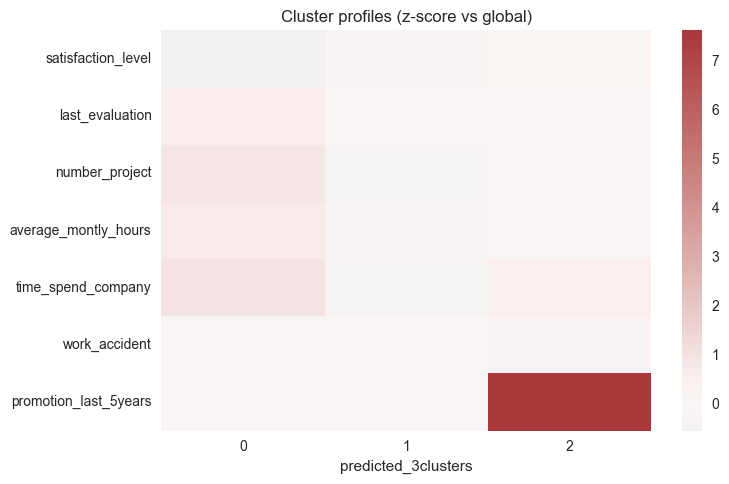

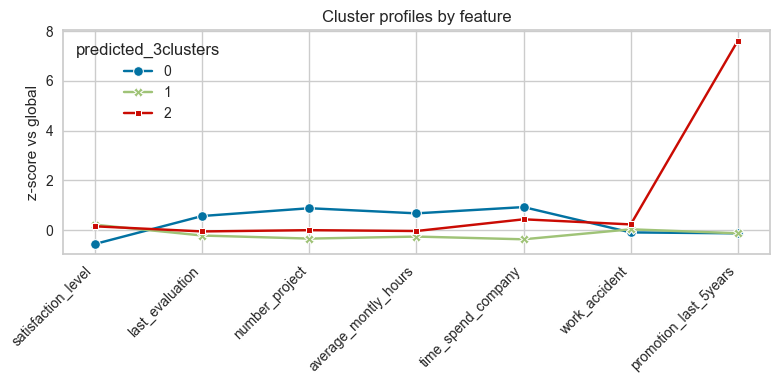

In [283]:
# 1) Standardise by global mean/std so features are comparable (z-scores)
global_mean = df[clus_pred.index].mean()
global_std  = df[clus_pred.index].std(ddof=0).replace(0, np.nan)
clus_z = clus_pred.subtract(global_mean, axis=0).divide(global_std, axis=0)

# 2) Rank features by separation (max–min across clusters in z-units)
sep = (clus_z.max(axis=1) - clus_z.min(axis=1)).sort_values(ascending=False)
print("Top separating features:\n", sep.head(10))

# 3a) Clear visual: heatmap (best for spotting patterns)
plt.figure(figsize=(8,5))
sns.heatmap(clus_z, cmap="vlag", center=0)
plt.title("Cluster profiles (z-score vs global)")
plt.tight_layout()
plt.show()

# 3b) If you still want a line plot, use z-scores + nicer formatting
plt.figure(figsize=(8,4))
sns.lineplot(data=clus_z, dashes=False, markers=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel("z-score vs global")
plt.title("Cluster profiles by feature")
plt.tight_layout()
plt.show()

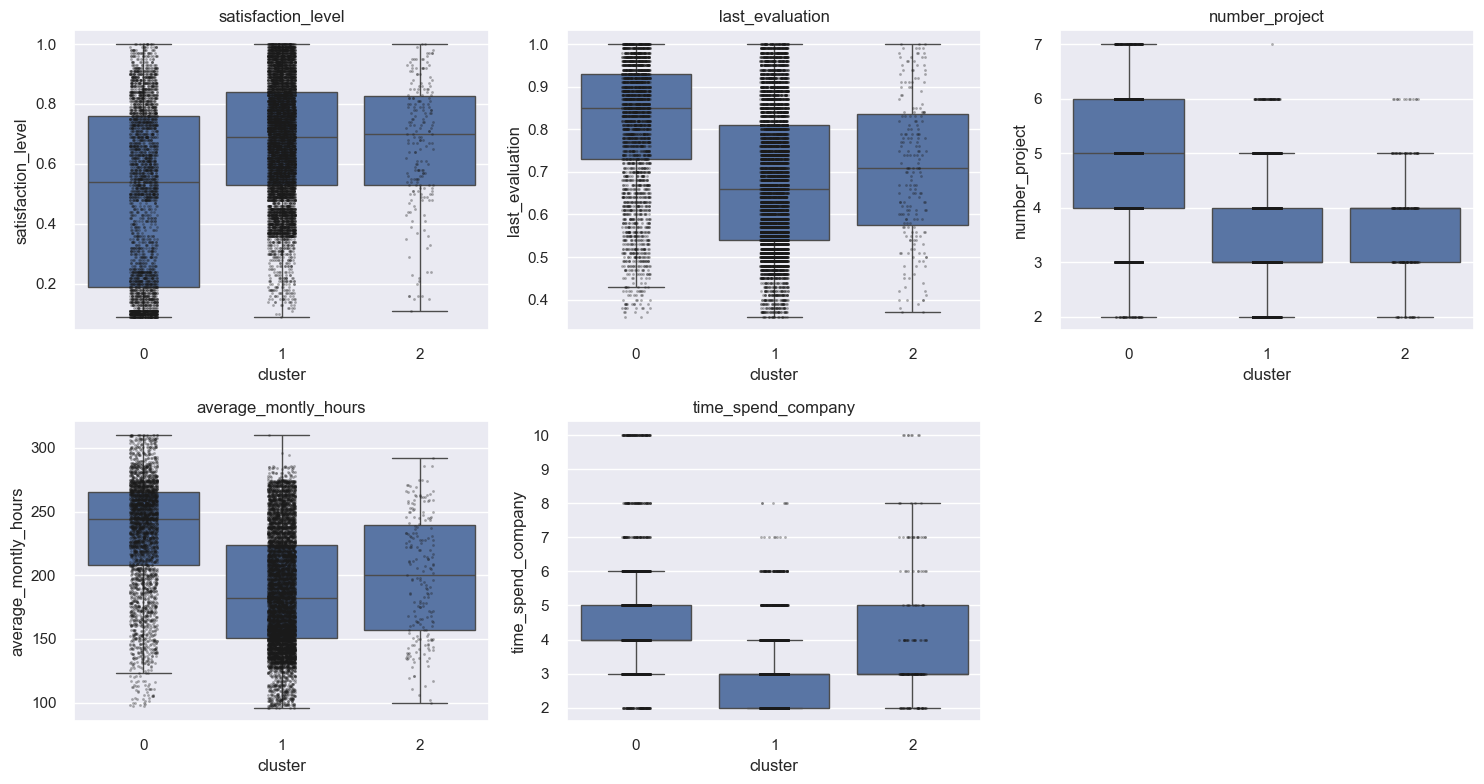

In [285]:
import math

sns.set_theme()

cluster_col = 'predicted_3clusters'   # gerekirse değiştir
# Sürekli/sayısal özellikler (ikili olanlar yerine bunları box+strip ile göster)
features = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company'
]

# (Opsiyonel) cluster sütununu kategorik yapalım, sıralı görünür
if df[cluster_col].dtype != 'category':
    df[cluster_col] = df[cluster_col].astype('category')

n = len(features)
ncols = 3
nrows = math.ceil(n / ncols)

plt.figure(figsize=(5*ncols, 4*nrows))
for i, col in enumerate(features, 1):
    ax = plt.subplot(nrows, ncols, i)
    sns.boxplot(data=df, x=cluster_col, y=col, showfliers=False, ax=ax)
    sns.stripplot(data=df, x=cluster_col, y=col, color='k', alpha=0.35, size=2, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('cluster')

plt.tight_layout()
plt.show()

/var/folders/vd/pk_681k922n_2yy4wynx_dpr0000gn/T/ipykernel_54724/3503265850.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/vd/pk_681k922n_2yy4wynx_dpr0000gn/T/ipykernel_54724/3503265850.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



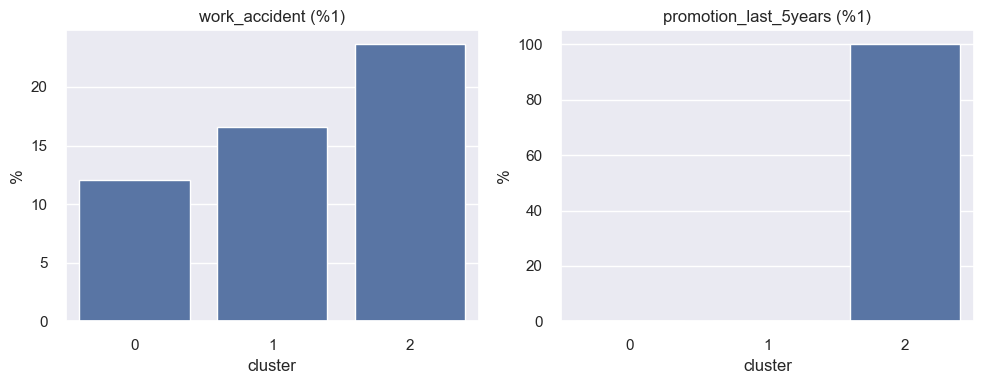

In [286]:
bin_cols = ['work_accident', 'promotion_last_5years']
fig, axes = plt.subplots(1, len(bin_cols), figsize=(5*len(bin_cols), 4))
if len(bin_cols) == 1: axes = [axes]
for ax, col in zip(axes, bin_cols):
    rate = df.groupby(cluster_col)[col].mean()*100
    sns.barplot(x=rate.index, y=rate.values, ax=ax)
    ax.set_title(f"{col} (%1)")
    ax.set_ylabel("%")
    ax.set_xlabel('cluster')
plt.tight_layout()
plt.show()

In [287]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

cluster_col = 'predicted_3clusters'   # gerekirse değiştir
label = 'left'

# Sayım ve oranlar
ct = pd.crosstab(df[cluster_col], df[label])
ct.columns = ['stayed_0','left_1']
ct['n'] = ct.sum(axis=1)
ct['churn_rate'] = ct['left_1'] / ct['n']

overall = df[label].mean()
ct['risk_diff']  = ct['churn_rate'] - overall            # küme - genel
ct['risk_ratio'] = ct['churn_rate'] / overall            # göreceli risk

ct = ct.sort_values('churn_rate', ascending=False)
print(ct.round(3))
print(f"Overall churn rate: {overall:.3f}")

# Bağımsızlık testi (küme ile churn ilişkili mi?)
chi2, p, dof, exp = chi2_contingency(pd.crosstab(df[cluster_col], df[label]))
print(f"Chi2={chi2:.2f}, dof={dof}, p-value={p:.3g}")


                     stayed_0  left_1     n  churn_rate  risk_diff  risk_ratio
predicted_3clusters                                                           
0                        2235    1075  3310       0.325      0.159       1.956
1                        7570     908  8478       0.107     -0.059       0.645
2                         195       8   203       0.039     -0.127       0.237
Overall churn rate: 0.166
Chi2=838.48, dof=2, p-value=8.42e-183


In [ ]:
# Yorumlama ipucu:

# churn_rate en yüksek olan küme = riskli segment.

# risk_diff (+) ise genel ortalamanın üstünde; (−) ise altında.

# risk_ratio > 1 ise göreceli risk artışı var.

# p-değeri küçükse (örn. <0.05) küme ile churn istatistiksel olarak ilişkili


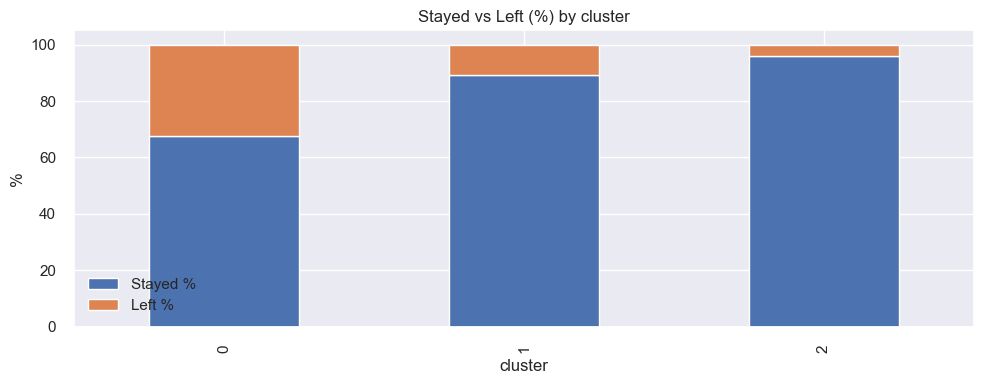

In [290]:

stack = pd.crosstab(df[cluster_col], df[label], normalize='index') * 100
stack = stack.rename(columns={0: 'Stayed %', 1: 'Left %'})

stack.plot(kind='bar', stacked=True, figsize=(10,4))
plt.title('Stayed vs Left (%) by cluster'); plt.ylabel('%'); plt.xlabel('cluster')
plt.legend(loc='lower left'); plt.tight_layout(); plt.show()

In [ ]:
Hızlı okuma (k=3)

İlişki güçlü: χ²=838.5, p≈8.4e-183 → küme ile churn anlamlı biçimde ilişkili.

Küme 0 (n=3310, %27.6) → churn %32.5 (≈ 2.0× genel).
Toplam churn’ün %54’ü bu kümeden (1075 / 1991). Öncelikli risk segmenti.

Küme 1 (n=8478, %70.7) → churn %10.7 (genelin altında, 0.65×).
Oranı düşük ama çok büyük olduğu için churn’ün %45.6’sı buradan.

Küme 2 (n=203, %1.7) → churn %3.9 (çok düşük). Etki küçük.

“Ne kadar kazanırız?” kaba bir etki hesabı:
Küme-0 churn’u %32.5 → %16.6 (genel) çekilirse ≈ 526 kişi daha az ayrılış (0.159×3310 ≈ 526).

In [291]:
cluster_col = 'predicted_3clusters'
num_cols = [c for c in df.select_dtypes(include='number').columns if c not in ['left', cluster_col]]

clus_mean = df.groupby(cluster_col)[num_cols].mean().T
global_mean = df[num_cols].mean()
global_std  = df[num_cols].std(ddof=0).replace(0, np.nan)
clus_z = clus_mean.sub(global_mean, axis=0).div(global_std, axis=0)  # z-skor sapmaları

# Küme 0 için en ayırt edici 5 özellik:
clus_z[0].abs().sort_values(ascending=False).head(5)

/var/folders/vd/pk_681k922n_2yy4wynx_dpr0000gn/T/ipykernel_54724/3512744944.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



time_spend_company      0.924689
number_project          0.878551
average_montly_hours    0.672390
last_evaluation         0.565427
satisfaction_level      0.558809
Name: 0, dtype: float64

In [292]:
dept_mix = (pd.crosstab(df[cluster_col], df['departments'], normalize='index')*100).round(1)
sal_mix  = (pd.crosstab(df[cluster_col], df['salary'], normalize='index')*100).round(1)
dept_mix.loc[0].sort_values(ascending=False).head(3), sal_mix.loc[0].sort_values(ascending=False)

(departments
 Sales        27.5
 Technical    18.5
 Support      14.6
 Name: 0, dtype: float64,
 salary
 low       48.6
 medium    43.8
 high       7.6
 Name: 0, dtype: float64)

/var/folders/vd/pk_681k922n_2yy4wynx_dpr0000gn/T/ipykernel_54724/3145329571.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



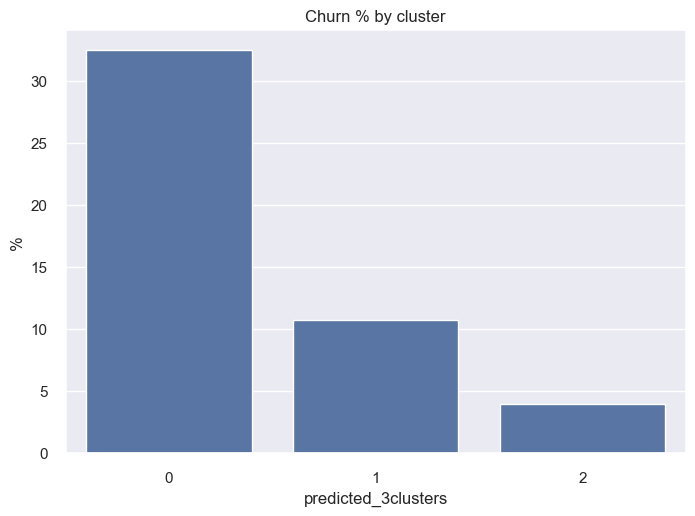

In [293]:
import seaborn as sns, matplotlib.pyplot as plt
cr = df.groupby(cluster_col)['left'].mean()*100
sns.barplot(x=cr.index, y=cr.values); plt.title("Churn % by cluster"); plt.ylabel("%"); plt.show()


In [294]:
clus_z[0].sort_values(ascending=False)  # en yüksekten en düşüğe, işaretli



time_spend_company       0.924689
number_project           0.878551
average_montly_hours     0.672390
last_evaluation          0.565427
work_accident           -0.094238
promotion_last_5years   -0.131228
satisfaction_level      -0.558809
Name: 0, dtype: float64

In [ ]:
# Küme 0 için en ayırt edici 5 özellik (globalden sapma büyüklüğüne göre):

# time_spend_company
# number_project
# average_montly_hours
# last_evaluation
# satisfaction_level

# Ayrıca dağılım:
# Departman karışımı: Sales %27.5, Technical %18.5, Support %14.6
# Maaş: Low %48.6, Medium %43.8, High %7.6 → düşük/orta maaşa belirgin yığılma.

# Bu profil çoğu zaman yüksek iş yükü / uzun kıdem (tenure↑, proje↑, saat↑) ve değerlendirme yüksek (evaluation↑) 
# ama memnuniyet düşük (satisfaction↓) imzasına işaret eder. 
# Bu da tükenmişlik riskini çağrıştırır—ki küme 0’da churn zaten %32.5 ile en yüksek.
# Departman tarafında Sales / Technical / Support ağırlığı ve low–medium maaş yığılması, 
# ücret ve iş yükü dengesinin olası faktörler olduğunu düşündürüyor.

In [296]:
import numpy as np
import pandas as pd

cluster_id = 0
label = 'left'
cluster_col = 'predicted_3clusters'

# --- sayısal imza (z-skor) ---
signed = clus_z[cluster_id].sort_values(ascending=False)
top_pos = signed.head(3)
top_neg = signed.tail(3)

# --- churn ve boyut ---
n = (df[cluster_col] == cluster_id).sum()
churn_pct = 100 * df.loc[df[cluster_col]==cluster_id, label].mean()

# --- kategorikler (küme içi %) ---
dept_mix = (pd.crosstab(df[cluster_col], df['departments'], normalize='index')*100).round(1)
sal_mix  = (pd.crosstab(df[cluster_col], df['salary'],      normalize='index')*100).round(1)

# İSİMLER + YÜZDELER -> string
dept_top3 = dept_mix.loc[cluster_id].sort_values(ascending=False).head(3)
dept_top3_str = ', '.join([f'{k} {v:.1f}%' for k, v in dept_top3.items()])

sal_row = sal_mix.loc[cluster_id].sort_values(ascending=False)
sal_mix_str = ', '.join([f'{k} {v:.1f}%' for k, v in sal_row.items()])

card = pd.DataFrame({
    'cluster': [cluster_id],
    'n': [n],
    'churn_%': [round(churn_pct,1)],
    'top+ (z)': [', '.join(f'{k}({v:+.2f})' for k,v in top_pos.items())],
    'top− (z)': [', '.join(f'{k}({v:+.2f})' for k,v in top_neg.items())],
    'dept top3 %': [dept_top3_str],
    'salary mix %': [sal_mix_str]
})

card


cluster     n  churn_%                                           top+ (z)  \
0        0  3310     32.5  time_spend_company(+0.92), number_project(+0.8...   

                                            top− (z)  \
0  work_accident(-0.09), promotion_last_5years(-0...   

                                   dept top3 %  \
0  Sales 27.5%, Technical 18.5%, Support 14.6%   

                         salary mix %  
0  low 48.6%, medium 43.8%, high 7.6%

In [ ]:
# Küme 0 (riskli):

# ↑ time_spend_company (kıdem): +0.92σ
# ↑ number_project (proje sayısı): +0.88σ
# ↑ average_montly_hours (aylık saat): +0.67σ
# ↑ last_evaluation (değerlendirme): +0.57σ
# ↓ satisfaction_level (memnuniyet): −0.56σ
# ↓ promotion_last_5years (terfi 5y): −0.13σ
# ↓ work_accident (iş kazası): −0.09σ
# Kısa yorum
# Yüksek iş yükü + uzun kıdem + yüksek değerlendirme ama düşük memnuniyet ve düşük terfi → klasik tükenmişlik / tıkanmış kariyer profili.
# Bu kümede churn zaten en yüksekti; bulgular bunu açıklıyor.
# Hızlı aksiyon hipotezleri
# İş yükü / saat: Proje yeniden dağıtımı, fazla mesai sınırları, “deep-work” blokları.
# Kariyer / terfi: Net ilerleme yolu, terfi kriterlerinin şeffaflaştırılması, mentorluk.
# Ödül / ücret: (Daha önceki dağılımda low/medium maaş yoğundu) Ücret bandı gözden geçirme.
# Yönetici 1:1 & nabız anketi: Memnuniyet odaklı kısa periyodik kontroller.

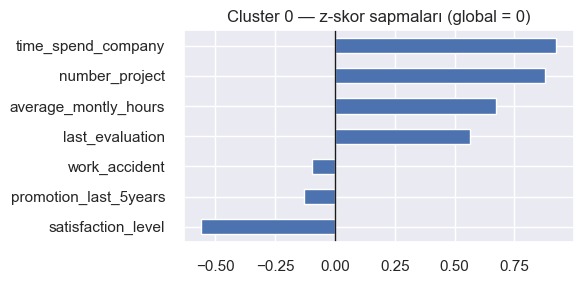

In [297]:
import seaborn as sns, matplotlib.pyplot as plt
ax = (clus_z[0]
      .loc[['time_spend_company','number_project','average_montly_hours',
            'last_evaluation','satisfaction_level','promotion_last_5years','work_accident']]
      .sort_values()
      .plot(kind='barh', figsize=(6,3)))
ax.set_title('Cluster 0 — z-skor sapmaları (global = 0)')
ax.axvline(0, color='k', linewidth=1)
plt.tight_layout(); plt.show()

In [298]:
import numpy as np
import pandas as pd

def make_cluster_cards(
    df,
    clus_z,
    cluster_col='predicted_3clusters',
    label='left',
    topk=3,
    dept_col='departments',
    sal_col='salary'
):
    overall = df[label].mean()

    # Kümeye göre kategorik dağılımlar (%)
    dept_mix = (pd.crosstab(df[cluster_col], df[dept_col], normalize='index')*100).round(1)
    sal_mix  = (pd.crosstab(df[cluster_col], df[sal_col],  normalize='index')*100).round(1)

    rows = []
    for k in sorted(df[cluster_col].unique()):
        # z-skor imzası (pozitif: globalden yüksek, negatif: düşük)
        signed = clus_z[k].sort_values(ascending=False)
        top_pos = signed.head(topk)
        top_neg = signed.tail(topk)

        mask = (df[cluster_col] == k)
        n = int(mask.sum())
        churn = df.loc[mask, label].mean()

        # Kategorik özetler (en baskın 3)
        dept_top3 = dept_mix.loc[k].sort_values(ascending=False).head(3)
        sal_top3  = sal_mix.loc[k].sort_values(ascending=False).head(3)

        rows.append({
            'cluster': k,
            'n': n,
            'churn_%': round(100*churn, 1),
            'risk_diff (pp)': round(100*(churn - overall), 1),
            'risk_ratio': round(churn/overall, 3) if overall > 0 else np.nan,
            'top+ (z)': ', '.join(f'{feat}({val:+.2f})' for feat, val in top_pos.items()),
            'top− (z)': ', '.join(f'{feat}({val:+.2f})' for feat, val in top_neg.items()),
            f'{dept_col} top3 %': ', '.join(f'{k2} {v2:.1f}%' for k2, v2 in dept_top3.items()),
            f'{sal_col} top3 %':  ', '.join(f'{k2} {v2:.1f}%' for k2, v2 in sal_top3.items()),
        })

    cards = pd.DataFrame(rows).sort_values('churn_%', ascending=False, ignore_index=True)
    return cards

# Kullanım:
cards = make_cluster_cards(df, clus_z, cluster_col='predicted_3clusters', label='left', topk=3)
cards


cluster     n  churn_%  risk_diff (pp)  risk_ratio  \
0        0  3310     32.5            15.9       1.956   
1        1  8478     10.7            -5.9       0.645   
2        2   203      3.9           -12.7       0.237   

                                            top+ (z)  \
0  time_spend_company(+0.92), number_project(+0.8...   
1  satisfaction_level(+0.21), work_accident(+0.03...   
2  promotion_last_5years(+7.62), time_spend_compa...   

                                            top− (z)  \
0  work_accident(-0.09), promotion_last_5years(-0...   
1  average_montly_hours(-0.26), number_project(-0...   
2  number_project(-0.00), average_montly_hours(-0...   

                               departments top3 %  \
0     Sales 27.5%, Technical 18.5%, Support 14.6%   
1     Sales 26.8%, Technical 19.0%, Support 15.6%   
2  Sales 28.6%, Management 17.7%, Marketing 13.3%   

                         salary top3 %  
0   low 48.6%, medium 43.8%, high 7.6%  
1   low 48.3%, medium 43.5%, high 8.2%  
2  medium 59.6%, high 21.7%, low 18.7%

In [ ]:
Küme 0 — Yüksek risk (n=3310, churn %32.5 | RR=1.96):
İmza: kıdem↑, proje↑, saat↑, değerlendirme↑, memnuniyet↓, terfi↓.
Hipotez: yüksek performans + ağır iş yükü + tıkanmış kariyer → tükenmişlik.
Öncelikli aksiyonlar:

İş yükü dengesi (proje yeniden dağıtımı / fazla mesai sınırı).

Terfi/ücret yolu şeffaflığı (özellikle low/medium maaş yoğunluğu).

Yönetsel 1:1 ve kısa nabız anketleri (memnuniyet takibi).
Etkisi büyük: Toplam churn’ün ~%54’ü bu kümeden geliyor (~1076/1991).

Küme 1 — Orta-düşük risk, kütle büyük (n=8478, churn %10.7 | RR=0.65):
İmza: memnuniyet hafif ↑, saat/proje ↓ (daha dengeli yük).
Aksiyon: Geniş ölçekli ama düşük yoğunluklu bağlılık inisiyatifleri (tanıma/teşekkür, esnek çalışma, mikro-iyileştirmeler).
Neden önemli: Churn düşük olsa da mutlak sayı yüksek (~908 kişi) — küçük iyileştirmeler bile çok kişiyi etkiler.

Küme 2 — Çok düşük risk, küçük kitle (n=203, churn %3.9 | RR=0.24):
İmza: terfi oranı güçlü↑, tenure biraz ↑, saat/proje düşük; maaş dağılımı medium/high ağırlıklı.
Aksiyon: Buradaki iyi uygulamaları dokümante edip Küme 0/1’e aktar (kariyer yolu, koçluk, denge).
----
Genel churn: %16.6.

Churn katkısı (yaklaşık): K0 ~1076, K1 ~908, K2 ~8.


## 4. Predictive Model Building

### 4.1. Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [64]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years departments  salary  left  cluster  cluster_3c  
0                          0       Sales     low     1        2           2  
1                          0       Sales  medium     1        1           1  
2                          0       Sales  medium     1        1           1  
3                          0       Sales     low     1        1           1  
4                          0       Sales     low     1        2           2  
...                      ...         ...     ...   ...      ...         ...  
11986                      1  Management    high     0        0           0  
11987                      1  Management    high     0        0           0  
11988                      1  Management    high     0        0           0  
11989                      1   Marketing    high     0        0           0  
11990                      0          IT     low     0        2           2  

[11991 rows x 12 columns]

In [67]:
from sklearn.model_selection import train_test_split

# 1) Split (stratified by the label)
X = df.drop(columns=['left'])
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Prepare DataFrames for Deepchecks
train_df = pd.concat([X_train, y_train], axis=1)
test_df  = pd.concat([X_test,  y_test],  axis=1)


In [77]:
# 5) Kontrol
print("X_train_prep shape:", X_train.shape)
print("X_test_prep  shape:", X_test.shape)
print("Pos rate (train/test):", y_train.mean().round(3), y_test.mean().round(3))

X_train_prep shape: (9592, 11)
X_test_prep  shape: (2399, 11)
Pos rate (train/test): 0.166 0.166


In [21]:
import warnings

# pandas FutureWarnings from deepchecks (observed=... and applymap deprecation)
warnings.filterwarnings("ignore", message=r"The default of observed=False is deprecated.*")
warnings.filterwarnings("ignore", message=r"DataFrame\.applymap has been deprecated.*")

# setuptools/pkg_resources deprecation spam (often via multiprocessing)
warnings.filterwarnings("ignore", message=r"pkg_resources is deprecated as an API.*")

In [319]:
%pip install -U deepchecks ipywidgets anywidget jupyterlab_widgets


Note: you may need to restart the kernel to use updated packages.


In [320]:
import ipywidgets as widgets, anywidget
widgets.IntSlider()  # should render

IntSlider(value=0)

In [68]:
from deepchecks.tabular.suites import train_test_validation
from deepchecks.tabular import Dataset

# 2) Wrap for Deepchecks
cat_cols = ['departments', 'salary']
train_ds = Dataset(train_df, label='left', cat_features=cat_cols)
test_ds  = Dataset(test_df,  label='left', cat_features=cat_cols)

# 3) Run the Train–Test Validation suite
ttv = train_test_validation()
ttv_result = ttv.run(train_ds, test_ds)
ttv_result.show()          # inline in Jupyter
# ttv_result.save_as_html('deepchecks_train_test.html')  # optional

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_VV3DD56T7MB8YE4G7BTRICJ86">Train Test Validat…

In [69]:

cont_cols = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company'
]

Q1 = df[cont_cols].quantile(0.25)
Q3 = df[cont_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[cont_cols] < (Q1 - 1.5*IQR)) | (df[cont_cols] > (Q3 + 1.5*IQR)))

print("Outlier sayısı (sütun bazında):")
display(outlier_mask.sum().sort_values(ascending=False))

print("En az bir sütunda outlier olan satır sayısı:", int(outlier_mask.any(axis=1).sum()))
print("Toplam içindeki oran: {:.2%}".format(outlier_mask.any(axis=1).mean()))

# İstersen ilk birkaç outlier satırı gör
df[outlier_mask.any(axis=1)].head()

Outlier sayısı (sütun bazında):


time_spend_company      824
satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
dtype: int64

En az bir sütunda outlier olan satır sayısı: 824
Toplam içindeki oran: 6.87%


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
1                 0.80             0.86               5                   262   
17                0.78             0.99               4                   255   
34                0.84             0.87               4                   246   
47                0.57             0.70               3                   273   
67                0.90             0.98               4                   264   

    time_spend_company  work_accident  promotion_last_5years  departments  \
1                    6              0                      0        Sales   
17                   6              0                      0        Sales   
34                   6              0                      0           HR   
47                   6              0                      0      Support   
67                   6              0                      0  Product_mng   

    salary  left  cluster  cluster_3c  
1   medium     1        1           1  
17     low     1        1           1  
34     low     1        1           1  
47     low     1        1           1  
67  medium     1        1           1

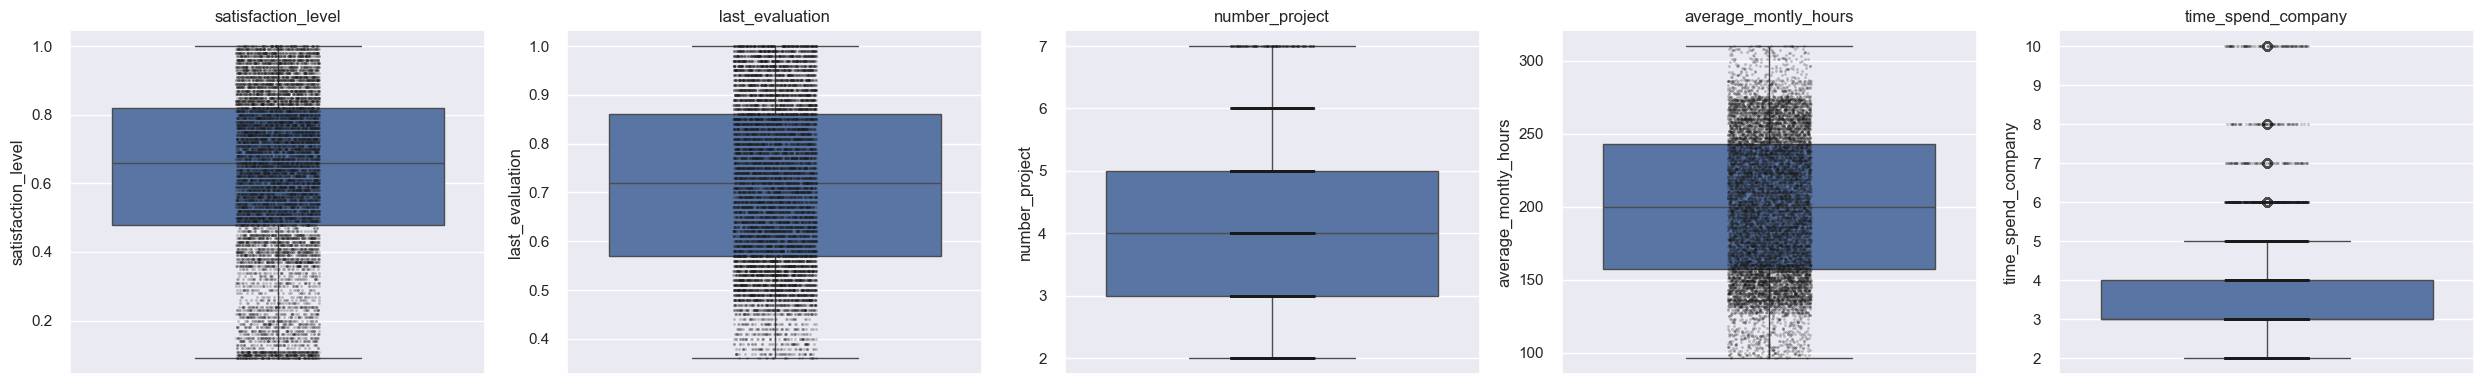

In [70]:
sns.set_theme()

fig, axes = plt.subplots(1, len(cont_cols), figsize=(5*len(cont_cols), 4))
if len(cont_cols) == 1: axes = [axes]
for ax, c in zip(axes, cont_cols):
    sns.boxplot(y=df[c], ax=ax, showfliers=True)
    sns.stripplot(y=df[c], ax=ax, color='k', alpha=0.25, size=2)
    ax.set_title(c)
plt.tight_layout()
plt.show()

In [72]:
vc = df['time_spend_company'].value_counts()
pd.DataFrame({'n': vc, '%': (vc / vc.sum() * 100).round(1)})

n     %
time_spend_company            
3                   5190  43.3
2                   2910  24.3
4                   2005  16.7
5                   1062   8.9
6                    542   4.5
10                   107   0.9
7                     94   0.8
8                     81   0.7

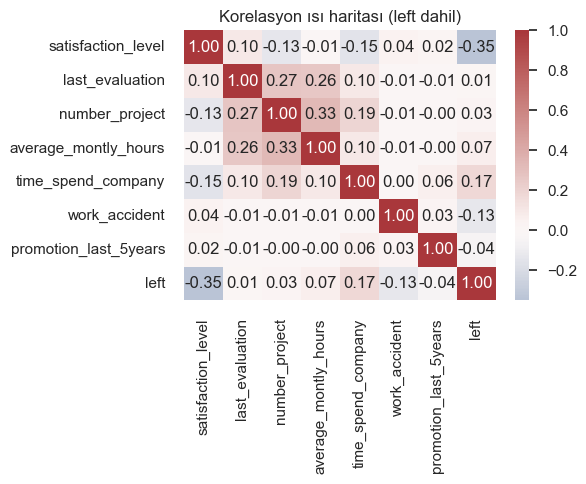

In [74]:
bin_cols = ['work_accident', 'promotion_last_5years']
num_for_corr = cont_cols + bin_cols + ['left']

corr = df[num_for_corr].corr(numeric_only=True)


plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Korelasyon ısı haritası (left dahil)")
plt.tight_layout()
plt.show()

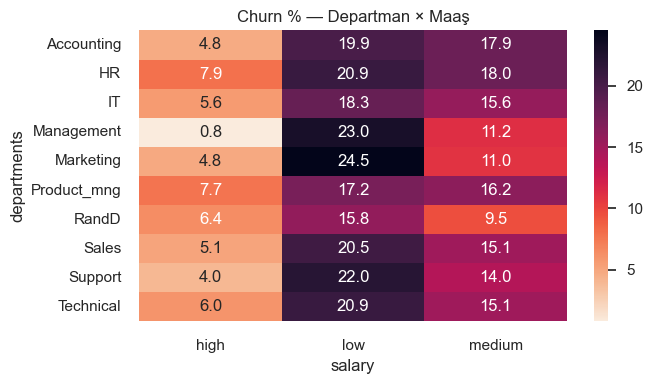

In [75]:
pivot = df.pivot_table(index='departments', columns='salary', values='left', aggfunc='mean') * 100
plt.figure(figsize=(7,4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="rocket_r")
plt.title("Churn % — Departman × Maaş")
plt.xlabel("salary"); plt.ylabel("departments")
plt.tight_layout()
plt.show()

### 4.2. Preprocessing

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

model   roc_auc    pr_auc        f1    brier↓
4  histgb  0.985328  0.968294  0.952637  0.014771
3      rf  0.981267  0.961828  0.944203  0.016734
5     svm  0.972833  0.933523  0.870640  0.027378
6     mlp  0.967660  0.928837  0.897135  0.029548
2     knn  0.962770  0.898524  0.857943  0.039658
1  logreg  0.838489  0.381375  0.546653  0.171146
0   dummy  0.500000  0.166041  0.000000  0.166041

In [78]:
# For models with predict_proba (RandomForest, kNN, Logistic, MLP), thr works as expected.
# For models without predict_proba (e.g., SVM unless probability=True), the cut is 0 on the 
# decision score; to use a true probability threshold, fit SVM with probability=True or wrap it with CalibratedClassifierCV.
# that adds a thr and uses probabilities when available:

from sklearn.metrics import confusion_matrix, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test, thr=0.5):
    def pred_at_thr(m, X, thr):
        if hasattr(m, "predict_proba"):              # most classifiers incl. RF, kNN, LR, MLP
            return (m.predict_proba(X)[:, 1] >= thr).astype(int)
        elif hasattr(m, "decision_function"):        # e.g., SVM without probability=True
            # decision_function is not a calibrated probability; use 0 as the default cut
            return (m.decision_function(X) >= 0).astype(int)
        else:
            return m.predict(X)

    y_pred  = pred_at_thr(model, X_test,  thr)
    y_trhat = pred_at_thr(model, X_train, thr)

    print("=== TEST ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))
    print("\n=== TRAIN ===")
    print(confusion_matrix(y_train, y_trhat))
    print(classification_report(y_train, y_trhat, digits=3))

In [163]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years departments  salary  left  cluster  cluster_3c  
0                          0       Sales     low     1        2           2  
1                          0       Sales  medium     1        1           1  
2                          0       Sales  medium     1        1           1  
3                          0       Sales     low     1        1           1  
4                          0       Sales     low     1        2           2  
...                      ...         ...     ...   ...      ...         ...  
11986                      1  Management    high     0        0           0  
11987                      1  Management    high     0        0           0  
11988                      1  Management    high     0        0           0  
11989                      1   Marketing    high     0        0           0  
11990                      0          IT     low     0        2           2  

[11991 rows x 12 columns]

### 4.3. Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### 4.3.1. Model Building, Evaluating  and Tuning

### a. Knn

In [79]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score, roc_auc_score

# 1) Preprocessing pipeline
prep_cv = ColumnTransformer([
    ('num', StandardScaler(), cont_cols + bin_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# 2) Model pipeline
pipe_knn = Pipeline([
    ('prep', prep_cv),
    ('clf', KNeighborsClassifier())
])

# 3) Grid search setup
param_grid = {
    'clf__n_neighbors': [5, 11, 15, 21, 25, 31, 41],
    'clf__weights': ['uniform', 'distance']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(
    pipe_knn, param_grid,
    scoring='average_precision',  # PR AUC
    cv=cv, n_jobs=-1, verbose=0
)

# 4) Fit grid search on raw training data
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("CV PR AUC:", round(gs.best_score_, 4))

# 5) Best pipeline and evaluation
best_knn_pipe = gs.best_estimator_
y_proba = best_knn_pipe.predict_proba(X_test)[:, 1]
print("Test PR AUC:", round(average_precision_score(y_test, y_proba), 4))
print("Test ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

Best params: {'clf__n_neighbors': 41, 'clf__weights': 'distance'}
CV PR AUC: 0.9096
Test PR AUC: 0.9259
Test ROC AUC: 0.9645


In [80]:
eval_metric(best_knn_pipe, X_train, y_train, X_test, y_test, thr=0.5)


=== TEST ===
[[1934   67]
 [  33  365]]
              precision    recall  f1-score   support

           0      0.983     0.967     0.975      2001
           1      0.845     0.917     0.880       398

    accuracy                          0.958      2399
   macro avg      0.914     0.942     0.927      2399
weighted avg      0.960     0.958     0.959      2399


=== TRAIN ===
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      7999
           1      1.000     1.000     1.000      1593

    accuracy                          1.000      9592
   macro avg      1.000     1.000     1.000      9592
weighted avg      1.000     1.000     1.000      9592



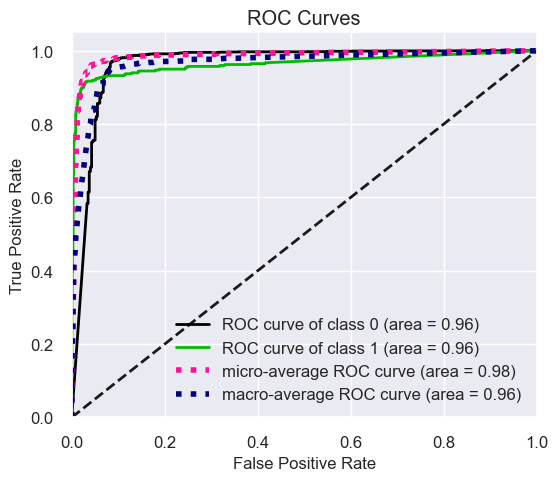

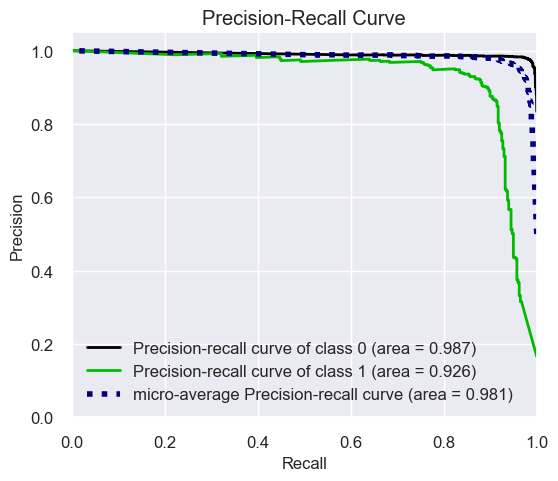

In [81]:
import scikitplot as skplt

y_proba_2d = best_knn_pipe.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_proba_2d, figsize=(6,5)); plt.show()
skplt.metrics.plot_precision_recall(y_test, y_proba_2d, figsize=(6,5)); plt.show()

In [89]:
import joblib
import os

# Create directory if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Save the best KNN pipeline
joblib.dump(best_knn_pipe, "saved_models/best_knn_pipe.joblib")
print("✅ best_knn_pipe saved to saved_models/best_knn_pipe.joblib")

✅ best_knn_pipe saved to saved_models/best_knn_pipe.joblib


### b.Random Forest

In [356]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)
rf_base.fit(X_train_prep, y_train)
eval_metric(rf_base, X_train_prep, y_train, X_test_prep, y_test, thr=0.5)

=== TEST ===
[[1996    5]
 [  32  366]]
              precision    recall  f1-score   support

           0      0.984     0.998     0.991      2001
           1      0.987     0.920     0.952       398

    accuracy                          0.985      2399
   macro avg      0.985     0.959     0.971      2399
weighted avg      0.985     0.985     0.984      2399


=== TRAIN ===
[[7983   16]
 [  33 1560]]
              precision    recall  f1-score   support

           0      0.996     0.998     0.997      7999
           1      0.990     0.979     0.985      1593

    accuracy                          0.995      9592
   macro avg      0.993     0.989     0.991      9592
weighted avg      0.995     0.995     0.995      9592



In [88]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, roc_auc_score

# Preprocess INSIDE CV (no leakage). For trees, scaling isn't needed, but it's harmless.
prep_cv = ColumnTransformer([
    ('num', StandardScaler(), cont_cols + bin_cols),                 # or 'passthrough' for RF
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

pipe_rf = Pipeline([
    ('prep', prep_cv),
    ('clf', RandomForestClassifier(class_weight='balanced_subsample',
                                   random_state=42, n_jobs=-1))
])

param_grid = {
    'clf__n_estimators': [300, 500, 800],
    'clf__max_depth': [8, 12, 16],
    'clf__min_samples_leaf': [2, 4, 8],
    'clf__max_features': ['sqrt', 'log2']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe_rf, param_grid, scoring='average_precision', cv=cv, n_jobs=-1, verbose=0)

gs.fit(X_train, y_train)  # RAW train (not preprocessed)
print("Best params:", gs.best_params_)
print("CV PR AUC:", round(gs.best_score_, 4))

rf_best_pipe = gs.best_estimator_  # full pipeline (prep + RF)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

Best params: {'clf__max_depth': 16, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__n_estimators': 500}
CV PR AUC: 0.9603


In [90]:

# Hold-out test evaluation (RAW X_test)
eval_metric(rf_best_pipe, X_train, y_train, X_test, y_test, thr=0.5)



=== TEST ===
[[1995    6]
 [  32  366]]
              precision    recall  f1-score   support

           0      0.984     0.997     0.991      2001
           1      0.984     0.920     0.951       398

    accuracy                          0.984      2399
   macro avg      0.984     0.958     0.971      2399
weighted avg      0.984     0.984     0.984      2399


=== TRAIN ===
[[7982   17]
 [  52 1541]]
              precision    recall  f1-score   support

           0      0.994     0.998     0.996      7999
           1      0.989     0.967     0.978      1593

    accuracy                          0.993      9592
   macro avg      0.991     0.983     0.987      9592
weighted avg      0.993     0.993     0.993      9592



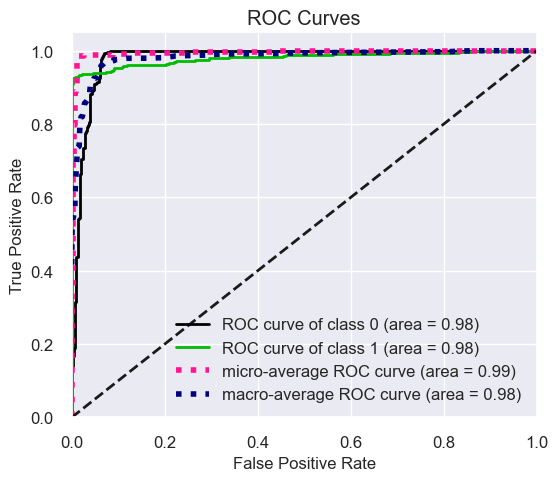

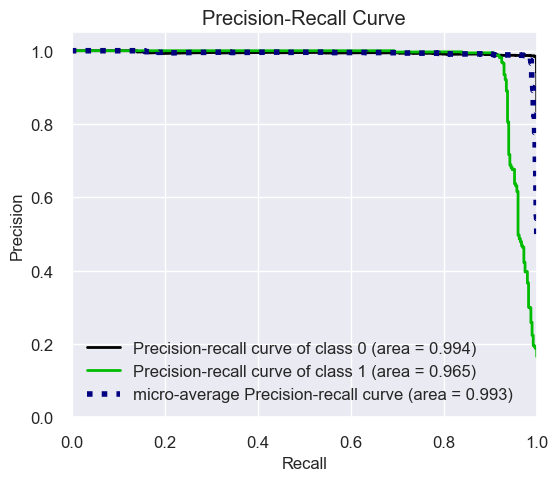

In [91]:

# 2D proba array (n_samples x n_classes)
y_proba_2d = rf_best_pipe.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba_2d, figsize=(6,5))
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_proba_2d, figsize=(6,5))
plt.show()

In [92]:
import joblib
import os

# Save the best KNN pipeline
joblib.dump(rf_best_pipe, "saved_models/rf_best_pipe.joblib")
print("✅  saved to saved_models/ joblib")

✅  saved to saved_models/ joblib


### c. Decision Tree

In [361]:
from sklearn.tree import DecisionTreeClassifier

dt_base = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=20,
    class_weight='balanced',
    random_state=42
)
dt_base.fit(X_train_prep, y_train)
eval_metric(dt_base, X_train_prep, y_train, X_test_prep, y_test, thr=0.5)

=== TEST ===
[[1934   67]
 [  25  373]]
              precision    recall  f1-score   support

           0      0.987     0.967     0.977      2001
           1      0.848     0.937     0.890       398

    accuracy                          0.962      2399
   macro avg      0.917     0.952     0.933      2399
weighted avg      0.964     0.962     0.962      2399


=== TRAIN ===
[[7782  217]
 [  91 1502]]
              precision    recall  f1-score   support

           0      0.988     0.973     0.981      7999
           1      0.874     0.943     0.907      1593

    accuracy                          0.968      9592
   macro avg      0.931     0.958     0.944      9592
weighted avg      0.969     0.968     0.968      9592



In [93]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Trees don't need scaling → passthrough numeric; OHE for categoricals
prep_cv = ColumnTransformer([
    ('num', 'passthrough', cont_cols + bin_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

pipe_dt = Pipeline([
    ('prep', prep_cv),
    ('clf', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

param_grid = {
    'clf__max_depth': [6, 8, 10, 12],
    'clf__min_samples_leaf': [10, 20, 40],
    'clf__max_features': [None, 'sqrt']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe_dt, param_grid, scoring='average_precision', cv=cv, n_jobs=-1)

# Fit on RAW train (no pre-transformed arrays)
gs.fit(X_train, y_train)
print("Best:", gs.best_params_, "CV PR AUC:", round(gs.best_score_, 4))

dt_best_pipe = gs.best_estimator_          # full pipeline (prep + DT)




Best: {'clf__max_depth': 8, 'clf__max_features': None, 'clf__min_samples_leaf': 20} CV PR AUC: 0.9452


In [94]:
# Evaluate on RAW test
eval_metric(dt_best_pipe, X_train, y_train, X_test, y_test, thr=0.5)


=== TEST ===
[[1945   56]
 [  28  370]]
              precision    recall  f1-score   support

           0      0.986     0.972     0.979      2001
           1      0.869     0.930     0.898       398

    accuracy                          0.965      2399
   macro avg      0.927     0.951     0.938      2399
weighted avg      0.966     0.965     0.965      2399


=== TRAIN ===
[[7819  180]
 [ 104 1489]]
              precision    recall  f1-score   support

           0      0.987     0.977     0.982      7999
           1      0.892     0.935     0.913      1593

    accuracy                          0.970      9592
   macro avg      0.940     0.956     0.948      9592
weighted avg      0.971     0.970     0.971      9592



In [96]:

# Save the best KNN pipeline
joblib.dump(dt_best_pipe, "saved_models/dt_best_pipe.joblib")
print("✅  saved to saved_models/ joblib")

✅  saved to saved_models/ joblib


In [ ]:
# fully interpretable single-tree model (simple rules, easy to explain).

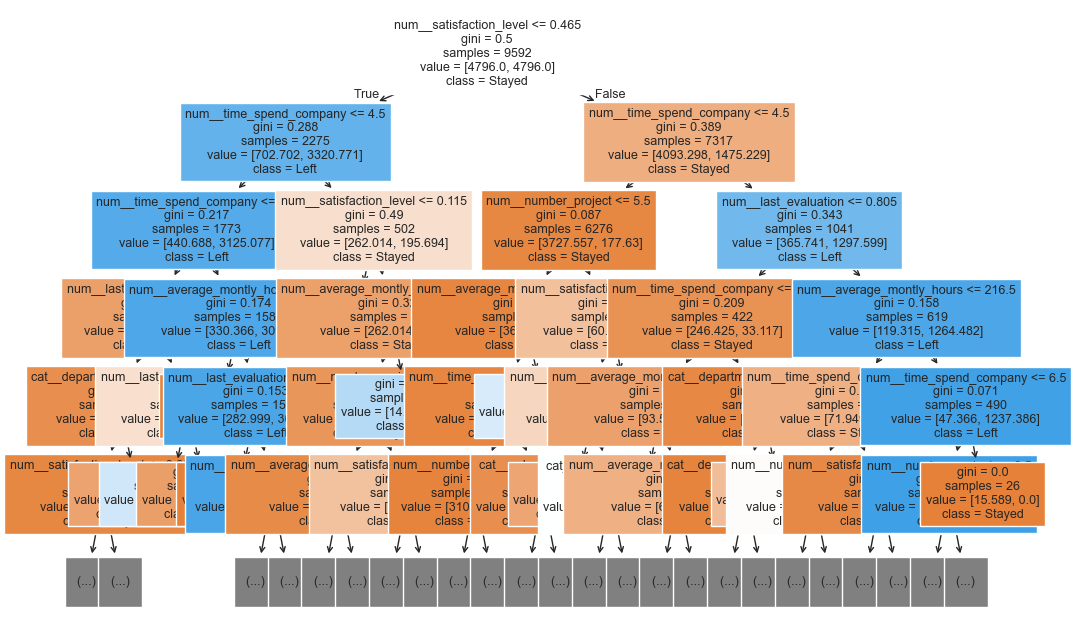

In [95]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=100)
plot_tree(
    dt_best_pipe.named_steps['clf'],                               # the tree inside the pipeline
    feature_names=dt_best_pipe.named_steps['prep'].get_feature_names_out(),
    class_names=['Stayed','Left'],
    filled=True, max_depth=5, fontsize=9
)
plt.show()

In [97]:

# same columns you already use
prep_cv = ColumnTransformer([
    ('num', 'passthrough', cont_cols + bin_cols),  # trees don't need scaling
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

pipe_dt = Pipeline([
    ('prep', prep_cv),
    ('clf', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# keep the good depth/leaves you liked, prune via ccp_alpha
param_grid = {
    'clf__max_depth': [8],             # or your preferred value
    'clf__min_samples_leaf': [20],     # "
    'clf__max_features': [None],
    'clf__ccp_alpha': [0.0, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2]   # pruning strength
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe_dt, param_grid, scoring='average_precision', cv=cv, n_jobs=-1)
gs.fit(X_train, y_train)                       # RAW train (no preprocessed arrays)

dt_pruned_pipe = gs.best_estimator_
print("Best params:", gs.best_params_, "CV PR AUC:", round(gs.best_score_, 4))

# hold-out test
eval_metric(dt_pruned_pipe, X_train, y_train, X_test, y_test, thr=0.5)


Best params: {'clf__ccp_alpha': 0.0, 'clf__max_depth': 8, 'clf__max_features': None, 'clf__min_samples_leaf': 20} CV PR AUC: 0.9452
=== TEST ===
[[1945   56]
 [  28  370]]
              precision    recall  f1-score   support

           0      0.986     0.972     0.979      2001
           1      0.869     0.930     0.898       398

    accuracy                          0.965      2399
   macro avg      0.927     0.951     0.938      2399
weighted avg      0.966     0.965     0.965      2399


=== TRAIN ===
[[7819  180]
 [ 104 1489]]
              precision    recall  f1-score   support

           0      0.987     0.977     0.982      7999
           1      0.892     0.935     0.913      1593

    accuracy                          0.970      9592
   macro avg      0.940     0.956     0.948      9592
weighted avg      0.971     0.970     0.971      9592



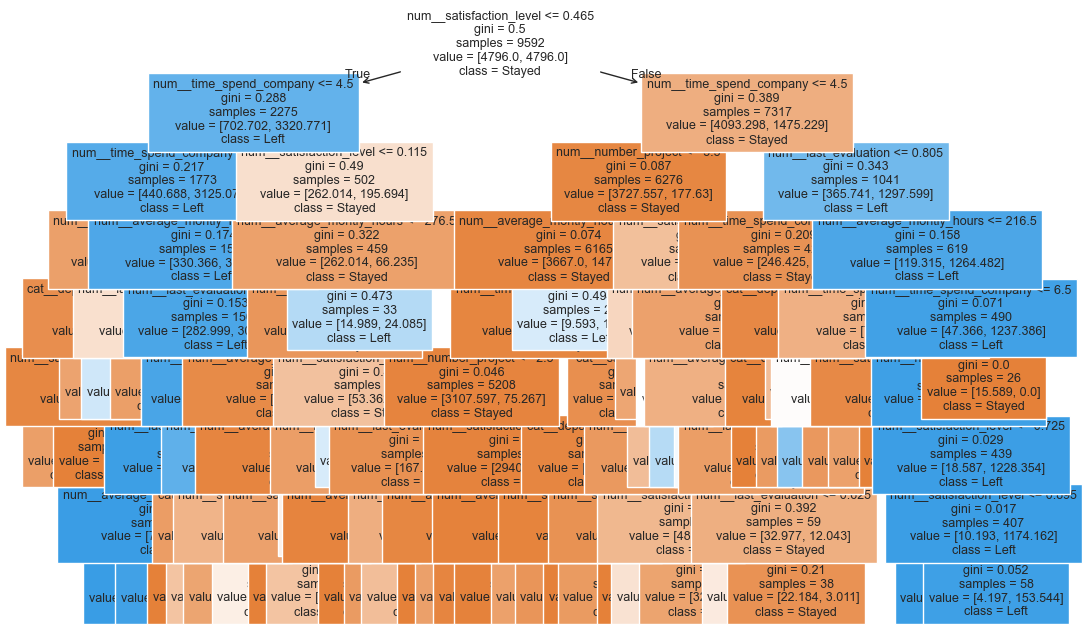

In [98]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=100)
plot_tree(
    dt_pruned_pipe.named_steps['clf'],
    feature_names=dt_pruned_pipe.named_steps['prep'].get_feature_names_out(),
    class_names=['Stayed','Left'],
    filled=True, max_depth=8, fontsize=9
); plt.show()

In [99]:

# Save the best KNN pipeline
joblib.dump(dt_pruned_pipe, "saved_models/dt_pruned_pipe.joblib")
print("✅  saved to saved_models/ joblib")

✅  saved to saved_models/ joblib


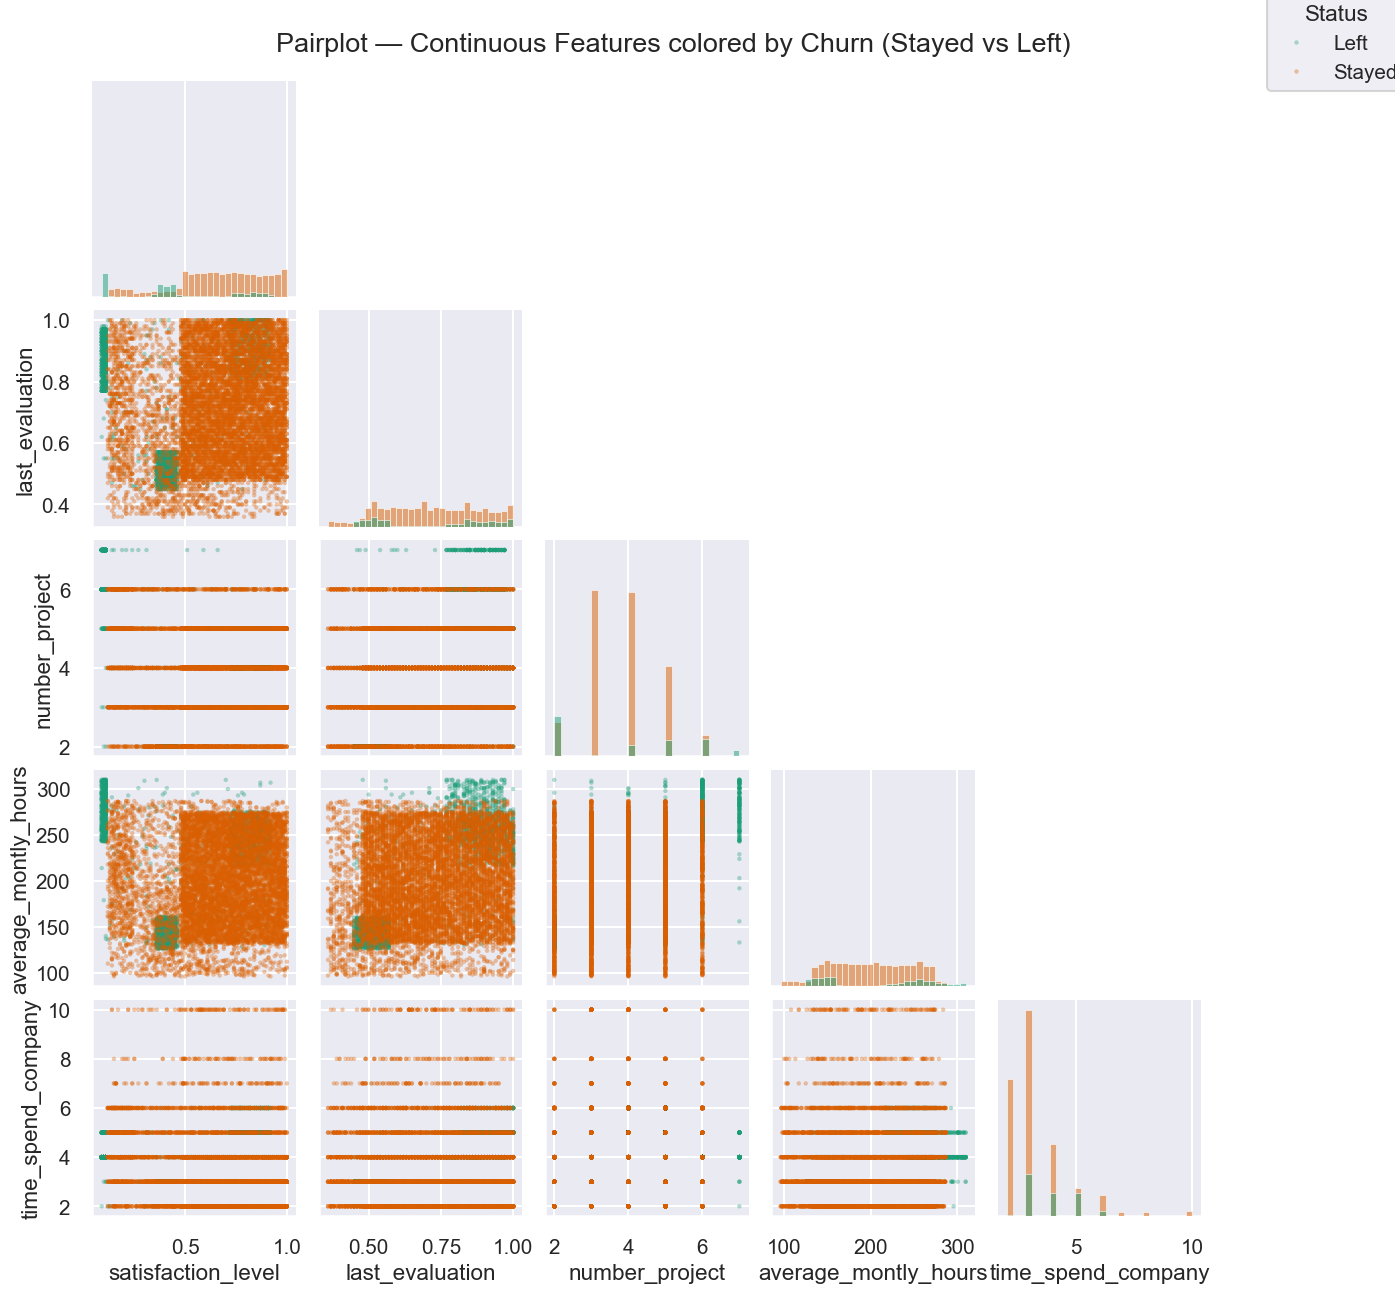

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use all rows; just build a clean plotting frame
df_plot = df.copy()
df_plot['left_label'] = df_plot['left'].map({0:'Stayed', 1:'Left'}).astype('category')

sns.set_theme()
sns.set_context("talk", font_scale=0.9)

g = sns.pairplot(
    df_plot,
    vars=cont_cols,                 # continuous features only
    hue='left_label',
    palette='Dark2',
    diag_kind='hist',               # faster than 'kde' for ~15k rows
    corner=True,                    # cleaner (lower triangle)
    plot_kws={'alpha':0.35, 's':10, 'linewidth':0},   # less overplotting
    diag_kws={'bins':30}
)

# Title + better legend
g.fig.suptitle("Pairplot — Continuous Features colored by Churn (Stayed vs Left)", y=1.02)
if g._legend is not None:
    g._legend.set_title("Status")
    g._legend.set_bbox_to_anchor((1.02, 1))
    g._legend.set_frame_on(True)

plt.show()


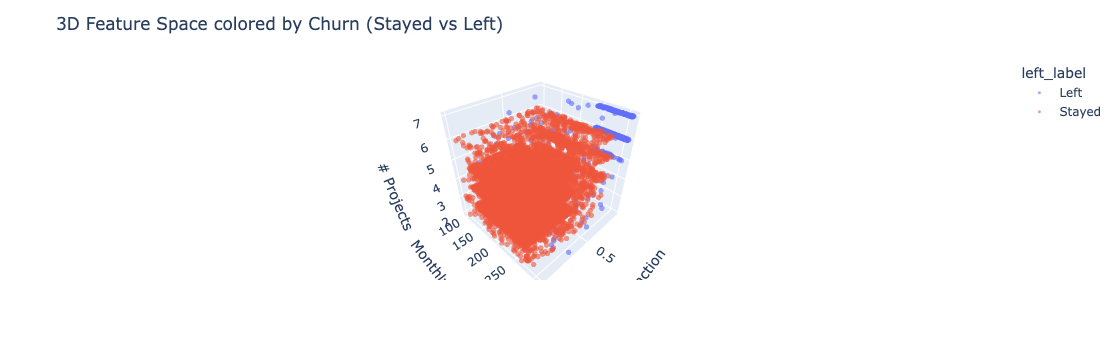

In [102]:
import plotly.express as px

df_plot = df.copy()
df_plot['left_label'] = df_plot['left'].map({0:'Stayed', 1:'Left'})

fig = px.scatter_3d(
    df_plot,
    x='satisfaction_level',
    y='average_montly_hours',
    z='number_project',
    color='left_label',                 # target as color
    opacity=0.6
)
fig.update_traces(marker=dict(size=3))
fig.update_layout(
    scene=dict(
        xaxis_title='Satisfaction',
        yaxis_title='Monthly Hours',
        zaxis_title='# Projects'
    ),
    title='3D Feature Space colored by Churn (Stayed vs Left)'
)
fig.show()


In [108]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years departments  salary  left  cluster  cluster_3c  
0                          0       Sales     low     1        2           2  
1                          0       Sales  medium     1        1           1  
2                          0       Sales  medium     1        1           1  
3                          0       Sales     low     1        1           1  
4                          0       Sales     low     1        2           2  
...                      ...         ...     ...   ...      ...         ...  
11986                      1  Management    high     0        0           0  
11987                      1  Management    high     0        0           0  
11988                      1  Management    high     0        0           0  
11989                      1   Marketing    high     0        0           0  
11990                      0          IT     low     0        2           2  

[11991 rows x 12 columns]

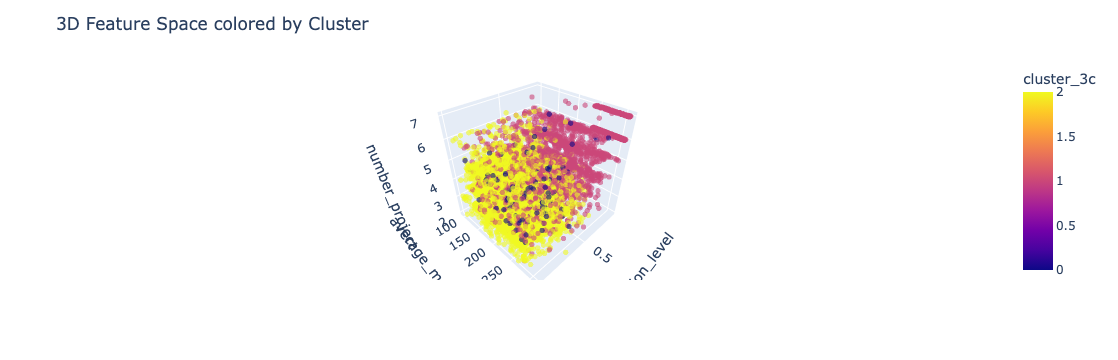

In [110]:
# predicted_3clusters

if 'cluster_3c' in df.columns:
    fig2 = px.scatter_3d(
        df,
        x='satisfaction_level',
        y='average_montly_hours',
        z='number_project',
        color='cluster_3c',
        opacity=0.6
    )
    fig2.update_traces(marker=dict(size=3))
    fig2.update_layout(title='3D Feature Space colored by Cluster')
    fig2.show()


In [111]:
import plotly.express as px

# Make a copy for plotting so you don't pollute training data
df_plot = df.copy()
df_plot['cluster'] = df.loc[df_plot.index, 'cluster_3c']  # pull from your earlier df
df_plot['left_label'] = df_plot['left'].map({0:'Stayed', 1:'Left'})

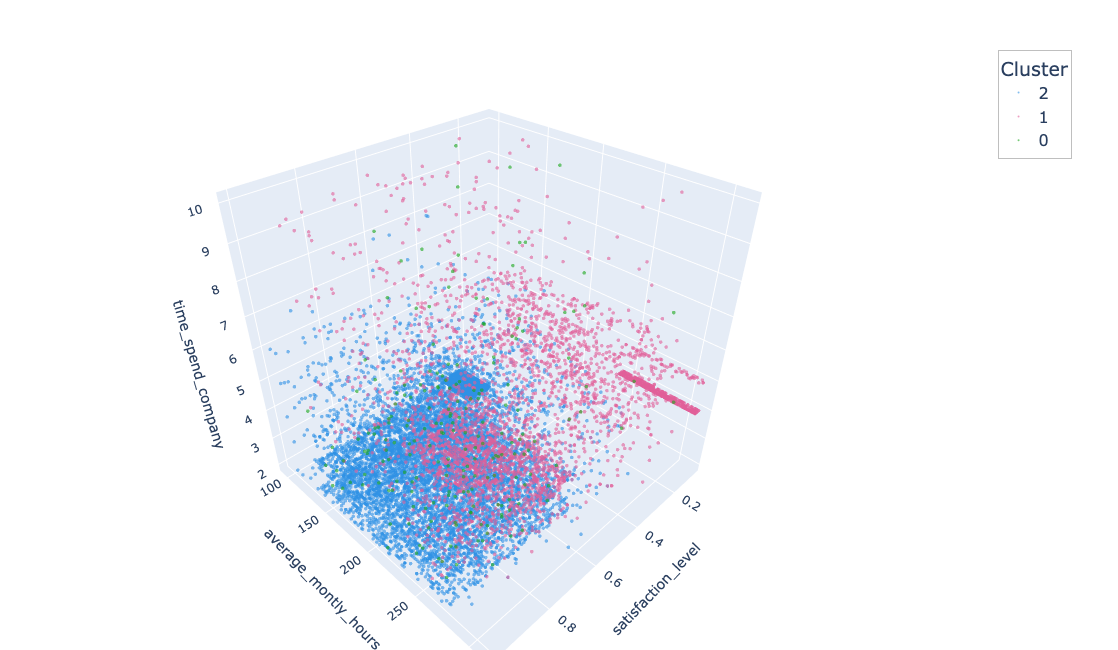

In [112]:

df_plot = df.copy()
df_plot['cluster'] = df.loc[df_plot.index, 'cluster_3c'].astype(str)  # nicer labels
df_plot['left_label'] = df_plot['left'].map({0:'Stayed', 1:'Left'})

fig = px.scatter_3d(
    df_plot,
    x='satisfaction_level',
    y='average_montly_hours',
    z='time_spend_company',
    color='cluster',
    opacity=0.6,
    color_discrete_sequence=px.colors.qualitative.Dark24  # stronger colors
)

fig.update_traces(marker=dict(size=2))
fig.update_layout(
    width=950, height=650,
    showlegend=True,
    legend=dict(
        title='Cluster',
        font=dict(size=16),
        yanchor='top', y=1,
        xanchor='left', x=1.02,      # put legend outside on the right
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor='rgba(0,0,0,0.25)', borderwidth=1
    ),
    margin=dict(l=0, r=140, t=50, b=0)  # give legend some room
)
fig.show()


In [410]:
# Alternate coloring by churn
fig2 = px.scatter_3d(
    df_plot,
    x='satisfaction_level',
    y='average_montly_hours',
    z='time_spend_company',
    color='left_label',
    opacity=0.6
)
fig2.update_traces(marker=dict(size=2))
fig2.update_layout(title='3D — colored by churn (Stayed vs Left)')
fig2.show()

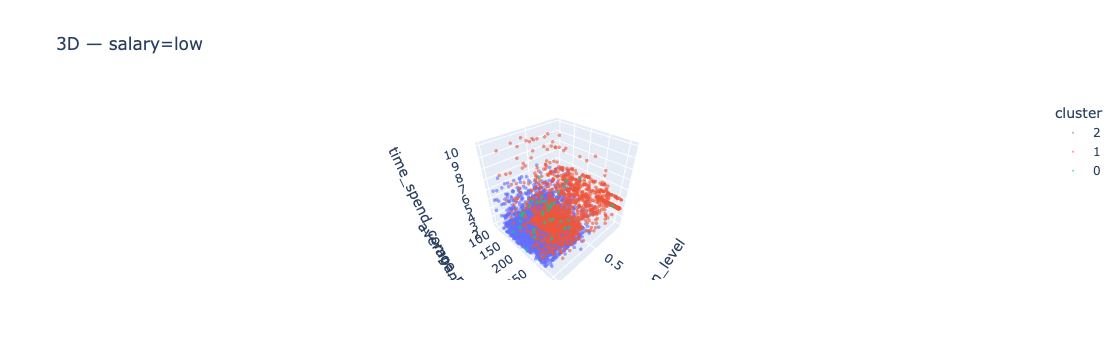

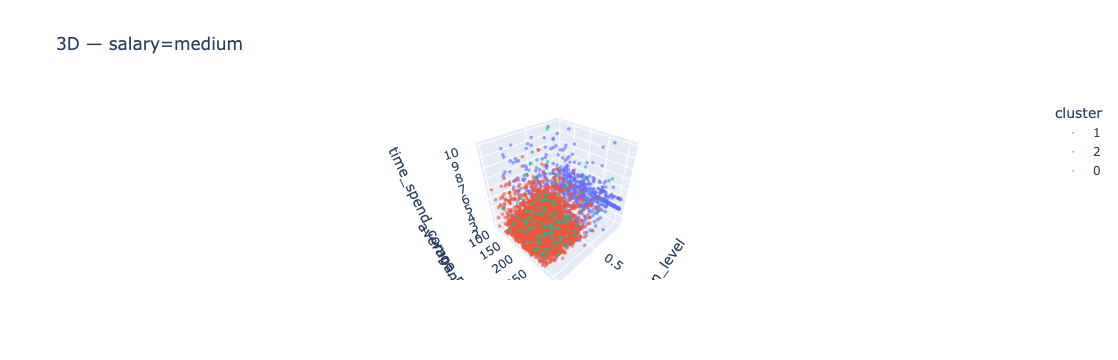

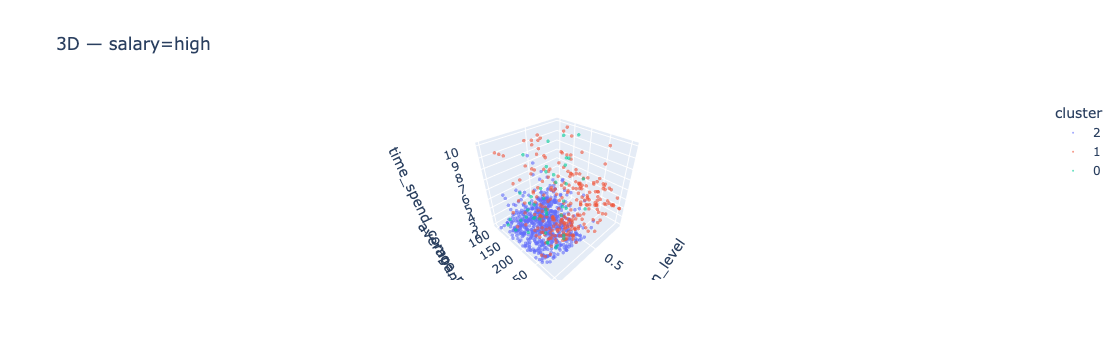

In [113]:
for s in ['low','medium','high']:
    sub = df_plot[df_plot['salary'] == s]
    if not sub.empty:
        fig = px.scatter_3d(
            sub,
            x='satisfaction_level', y='average_montly_hours', z='time_spend_company',
            color='cluster', opacity=0.6, title=f'3D — salary={s}'
        )
        fig.update_traces(marker=dict(size=2))
        fig.show()

### d. AdaBoostClassifier

In [386]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=42),
    n_estimators=300,
    learning_rate=0.1,
    random_state=42
)
ada.fit(X_train_prep, y_train)
eval_metric(ada, X_train_prep, y_train, X_test_prep, y_test, thr=0.5)

=== TEST ===
[[1969   32]
 [  62  336]]
              precision    recall  f1-score   support

           0      0.969     0.984     0.977      2001
           1      0.913     0.844     0.877       398

    accuracy                          0.961      2399
   macro avg      0.941     0.914     0.927      2399
weighted avg      0.960     0.961     0.960      2399


=== TRAIN ===
[[7890  109]
 [ 285 1308]]
              precision    recall  f1-score   support

           0      0.965     0.986     0.976      7999
           1      0.923     0.821     0.869      1593

    accuracy                          0.959      9592
   macro avg      0.944     0.904     0.922      9592
weighted avg      0.958     0.959     0.958      9592



In [126]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

prep_cv = ColumnTransformer([
    ('num', StandardScaler(), cont_cols + bin_cols),                   # trees don't need scaling, but ok
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

pipe_ada = Pipeline([
    ('prep', prep_cv),
    ('clf', AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                               random_state=42))
])

param_grid = {
    'clf__estimator__max_depth': [1, 2],
    'clf__estimator__min_samples_leaf': [10, 20, 40],
    'clf__n_estimators': [200, 300, 500],
    'clf__learning_rate': [0.05, 0.1, 0.2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe_ada, param_grid, scoring='average_precision', cv=cv, n_jobs=-1)
gs.fit(X_train, y_train)                      # RAW X_train (no pre-transformed arrays)

best_ada_pipe = gs.best_estimator_


In [127]:
eval_metric(best_ada_pipe, X_train, y_train, X_test, y_test, thr=0.5)  # RAW X


=== TEST ===
[[1974   27]
 [  28  370]]
              precision    recall  f1-score   support

           0      0.986     0.987     0.986      2001
           1      0.932     0.930     0.931       398

    accuracy                          0.977      2399
   macro avg      0.959     0.958     0.959      2399
weighted avg      0.977     0.977     0.977      2399


=== TRAIN ===
[[7920   79]
 [ 135 1458]]
              precision    recall  f1-score   support

           0      0.983     0.990     0.987      7999
           1      0.949     0.915     0.932      1593

    accuracy                          0.978      9592
   macro avg      0.966     0.953     0.959      9592
weighted avg      0.977     0.978     0.978      9592



In [128]:

# Save the best  pipeline
joblib.dump(best_ada_pipe, "saved_models/best_ada_pipe.joblib")
print("✅  saved to saved_models/ joblib")

✅  saved to saved_models/ joblib


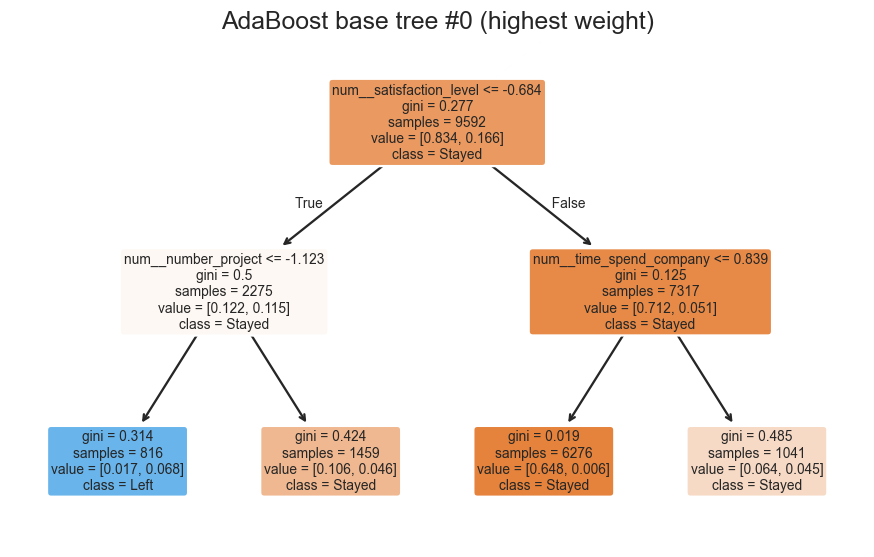

In [117]:

from sklearn.tree import plot_tree

ada_clf = best_ada_pipe.named_steps['clf']
prep    = best_ada_pipe.named_steps['prep']

i = int(np.argmax(ada_clf.estimator_weights_))   # choose tree to plot
feat_names = prep.get_feature_names_out()

plt.figure(figsize=(10,6), dpi=110)
plot_tree(
    ada_clf.estimators_[i],
    feature_names=feat_names,
    class_names=['Stayed','Left'],
    filled=True, rounded=True, fontsize=9
)
plt.title(f'AdaBoost base tree #{i} (highest weight)')
plt.show()


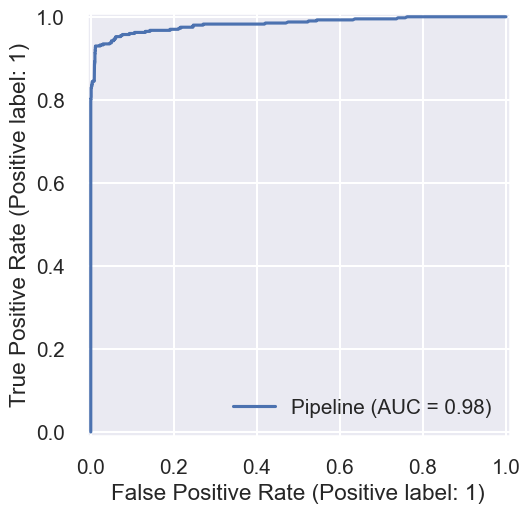

In [118]:
from sklearn.metrics import roc_auc_score,\
                            RocCurveDisplay, PrecisionRecallDisplay
RocCurveDisplay.from_estimator(best_ada_pipe, X_test, y_test);

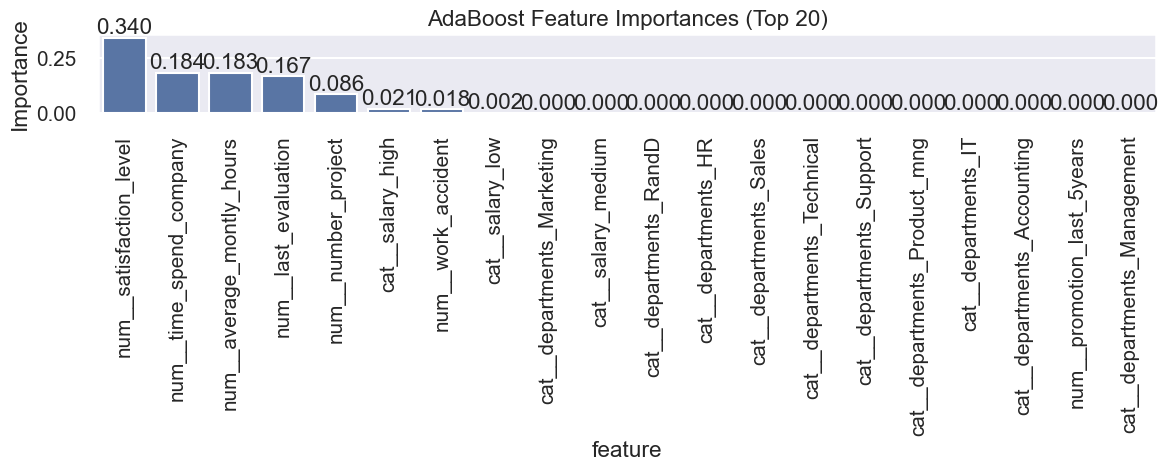

In [119]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

ada_clf   = best_ada_pipe.named_steps['clf']
feat_names = best_ada_pipe.named_steps['prep'].get_feature_names_out()

imp = pd.Series(ada_clf.feature_importances_, index=feat_names).sort_values(ascending=False)
imp_df = imp.head(20).reset_index()
imp_df.columns = ['feature','ada_importance']

plt.figure(figsize=(12,5))
ax = sns.barplot(data=imp_df, x='feature', y='ada_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90); plt.ylabel('Importance'); plt.title('AdaBoost Feature Importances (Top 20)')
plt.tight_layout(); plt.show()

### e. GradientBoostingClassifier

In [423]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Preprocess inside the pipeline (no leakage)
prep_cv = ColumnTransformer([
    ('num', 'passthrough', cont_cols + bin_cols),   # trees don't need scaling
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

gb_base = Pipeline([
    ('prep', prep_cv),
    ('clf', GradientBoostingClassifier(random_state=42))
])

gb_base.fit(X_train, y_train)                       # RAW X_train


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'work_accident',
                                                   'promotion_last_5years']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['departments', 'salary'])])),
                ('clf', GradientBoostingClassifier(random_state=42))])

In [424]:
eval_metric(gb_base, X_train, y_train, X_test, y_test, thr=0.5)  # RAW X

=== TEST ===
[[1981   20]
 [  28  370]]
              precision    recall  f1-score   support

           0      0.986     0.990     0.988      2001
           1      0.949     0.930     0.939       398

    accuracy                          0.980      2399
   macro avg      0.967     0.960     0.964      2399
weighted avg      0.980     0.980     0.980      2399


=== TRAIN ===
[[7952   47]
 [ 114 1479]]
              precision    recall  f1-score   support

           0      0.986     0.994     0.990      7999
           1      0.969     0.928     0.948      1593

    accuracy                          0.983      9592
   macro avg      0.978     0.961     0.969      9592
weighted avg      0.983     0.983     0.983      9592



In [120]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score

# Preprocess inside CV (trees don't need scaling)
prep_cv = ColumnTransformer([
    ('num', 'passthrough', cont_cols + bin_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

pipe_gb = Pipeline([
    ('prep', prep_cv),
    ('clf', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [300, 500, 800],
    'clf__learning_rate': [0.05, 0.1, 0.2],
    'clf__max_depth': [2, 3],
    'clf__min_samples_leaf': [20, 50],
    'clf__subsample': [0.8, 1.0],
    'clf__max_features': ['sqrt', None],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe_gb, param_grid, scoring='average_precision', cv=cv, n_jobs=-1, verbose=0)

gs.fit(X_train, y_train)  # RAW train
print("Best params:", gs.best_params_)
print("CV PR AUC:", round(gs.best_score_, 4))

gb_best_pipe = gs.best_estimator_


Best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__max_features': None, 'clf__min_samples_leaf': 50, 'clf__n_estimators': 300, 'clf__subsample': 1.0}
CV PR AUC: 0.969


In [129]:

# Hold-out test
eval_metric(gb_best_pipe, X_train, y_train, X_test, y_test, thr=0.5)



=== TEST ===
[[1981   20]
 [  28  370]]
              precision    recall  f1-score   support

           0      0.986     0.990     0.988      2001
           1      0.949     0.930     0.939       398

    accuracy                          0.980      2399
   macro avg      0.967     0.960     0.964      2399
weighted avg      0.980     0.980     0.980      2399


=== TRAIN ===
[[7957   42]
 [ 113 1480]]
              precision    recall  f1-score   support

           0      0.986     0.995     0.990      7999
           1      0.972     0.929     0.950      1593

    accuracy                          0.984      9592
   macro avg      0.979     0.962     0.970      9592
weighted avg      0.984     0.984     0.984      9592



In [130]:
# (optional) explicit PR/ROC on test
proba = gb_best_pipe.predict_proba(X_test)[:, 1]
print("Test PR AUC:", round(average_precision_score(y_test, proba), 4))
print("Test ROC AUC:", round(roc_auc_score(y_test, proba), 4))


Test PR AUC: 0.968
Test ROC AUC: 0.9838


In [131]:

# Save the best  pipeline
joblib.dump(gb_best_pipe, "saved_models/gb_best_pipe.joblib")
print("✅  saved to saved_models/ joblib")

✅  saved to saved_models/ joblib


### f. XGBClassifier

In [133]:
from xgboost import XGBClassifier
xgb_base = XGBClassifier(random_state=42)
xgb_base.fit(X_train_prep, y_train)


NameError: name 'X_train_prep' is not defined

In [134]:
y_pred = xgb_base.predict(X_test_prep)


NameError: name 'X_test_prep' is not defined

In [434]:
eval_metric(xgb_base, X_train_prep, y_train, X_test_prep, y_test, thr=0.5)


=== TEST ===
[[1982   19]
 [  28  370]]
              precision    recall  f1-score   support

           0      0.986     0.991     0.988      2001
           1      0.951     0.930     0.940       398

    accuracy                          0.980      2399
   macro avg      0.969     0.960     0.964      2399
weighted avg      0.980     0.980     0.980      2399


=== TRAIN ===
[[7993    6]
 [  24 1569]]
              precision    recall  f1-score   support

           0      0.997     0.999     0.998      7999
           1      0.996     0.985     0.991      1593

    accuracy                          0.997      9592
   macro avg      0.997     0.992     0.994      9592
weighted avg      0.997     0.997     0.997      9592



In [135]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# --- Preprocess (aynı) ---
prep_cv = ColumnTransformer([
    ('num', 'passthrough', cont_cols + bin_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# --- Pipeline ---
pipe_xgb = Pipeline([
    ('prep', prep_cv),
    ('clf', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1,
        tree_method='hist'
    ))
])

# --- Parametre grid ---
param_grid_xgb = {
    'clf__n_estimators': [100, 300, 500],
    'clf__learning_rate': [0.05, 0.1, 0.2],
    'clf__max_depth': [3, 4, 6],
    'clf__min_child_weight': [1, 5],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0],
    'clf__gamma': [0, 1]
}

# --- CV ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_xgb = GridSearchCV(
    pipe_xgb,
    param_grid_xgb,
    scoring='average_precision',  # PR AUC
    cv=cv,
    n_jobs=-1,
    verbose=0
)

# --- Fit ---
gs_xgb.fit(X_train, y_train)

print("Best params:", gs_xgb.best_params_)
print("CV PR AUC:", round(gs_xgb.best_score_, 4))

xgb_best_pipe = gs_xgb.best_estimator_


Best params: {'clf__colsample_bytree': 1.0, 'clf__gamma': 1, 'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__min_child_weight': 1, 'clf__n_estimators': 300, 'clf__subsample': 1.0}
CV PR AUC: 0.9698


In [136]:
eval_metric(xgb_best_pipe, X_train, y_train, X_test, y_test, thr=0.5)


=== TEST ===
[[1985   16]
 [  28  370]]
              precision    recall  f1-score   support

           0      0.986     0.992     0.989      2001
           1      0.959     0.930     0.944       398

    accuracy                          0.982      2399
   macro avg      0.972     0.961     0.966      2399
weighted avg      0.982     0.982     0.982      2399


=== TRAIN ===
[[7966   33]
 [ 115 1478]]
              precision    recall  f1-score   support

           0      0.986     0.996     0.991      7999
           1      0.978     0.928     0.952      1593

    accuracy                          0.985      9592
   macro avg      0.982     0.962     0.972      9592
weighted avg      0.985     0.985     0.984      9592



In [137]:

# Save the best  pipeline
joblib.dump(xgb_best_pipe, "saved_models/xgb_best_pipe.joblib")
print("✅  saved to saved_models/ joblib")

✅  saved to saved_models/ joblib


In [33]:

from tensorflow import keras
import tensorflow as tf

#Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed

seed = 42
keras.utils.set_random_seed(seed)

### deep learning

In [41]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years departments  salary  left  
0                          0       Sales     low     1  
1                          0       Sales  medium     1  
2                          0       Sales  medium     1  
3                          0       Sales     low     1  
4                          0       Sales     low     1  
...                      ...         ...     ...   ...  
11986                      1  Management    high     0  
11987                      1  Management    high     0  
11988                      1  Management    high     0  
11989                      1   Marketing    high     0  
11990                      0          IT     low     0  

[11991 rows x 10 columns]

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Numeric ve binary kolonlar
cont_cols = ["satisfaction_level", "last_evaluation",'number_project', "average_montly_hours", "time_spend_company"]
bin_cols  = ["work_accident", "promotion_last_5years"]
cat_cols  = ["departments", "salary"]

# Preprocess (trees için scaling yok, OHE var)
prep_cv = ColumnTransformer([
    ('num', 'passthrough', cont_cols + bin_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

In [139]:
# 1) Split yaptık
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.10, random_state=42
)
#for imbalanced data, it is better to split validation data manually (e.g., stratified split),
# instead of using validation_split, to preserve class distribution.!!!

# 2) Preprocess (prep_cv bizim pipeline)
X_train_dl = prep_cv.fit_transform(X_train)
X_val_dl   = prep_cv.transform(X_val)
X_test_dl  = prep_cv.transform(X_test)


In [140]:
X_train.shape

(9711, 11)

In [141]:
X_val.shape

(1080, 11)

In [142]:
X_test.shape

(1200, 11)

In [143]:
n_features = X_train_dl.shape[1]

# --- Base Model ---
base_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_features,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

base_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="roc_auc")]
)


2025-09-12 17:11:34.104422: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-09-12 17:11:34.105311: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-09-12 17:11:34.105396: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-09-12 17:11:34.105426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-12 17:11:34.105490: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [144]:
# --- Training with validation ---
history = base_model.fit(
    X_train_dl, y_train,
    validation_data=(X_val_dl, y_val),
    epochs=50,
    batch_size=32,
    verbose=2
)

Epoch 1/50


2025-09-12 17:11:41.223785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


304/304 - 4s - 15ms/step - accuracy: 0.7936 - loss: 1.0494 - roc_auc: 0.5453 - val_accuracy: 0.7806 - val_loss: 0.4847 - val_roc_auc: 0.6795
Epoch 2/50
304/304 - 2s - 6ms/step - accuracy: 0.8223 - loss: 0.4447 - roc_auc: 0.6383 - val_accuracy: 0.8148 - val_loss: 0.4330 - val_roc_auc: 0.7685
Epoch 3/50
304/304 - 2s - 6ms/step - accuracy: 0.8283 - loss: 0.4207 - roc_auc: 0.6910 - val_accuracy: 0.8204 - val_loss: 0.4083 - val_roc_auc: 0.7917
Epoch 4/50
304/304 - 2s - 6ms/step - accuracy: 0.8285 - loss: 0.4073 - roc_auc: 0.7258 - val_accuracy: 0.8222 - val_loss: 0.3970 - val_roc_auc: 0.7948
Epoch 5/50
304/304 - 2s - 6ms/step - accuracy: 0.8288 - loss: 0.3988 - roc_auc: 0.7468 - val_accuracy: 0.8278 - val_loss: 0.3910 - val_roc_auc: 0.7948
Epoch 6/50
304/304 - 2s - 6ms/step - accuracy: 0.8279 - loss: 0.3932 - roc_auc: 0.7602 - val_accuracy: 0.8306 - val_loss: 0.3877 - val_roc_auc: 0.7949
Epoch 7/50
304/304 - 2s - 6ms/step - accuracy: 0.8268 - loss: 0.3894 - roc_auc: 0.7690 - val_accuracy: 0

In [145]:
# --- Evaluation on test set ---
proba = base_model.predict(X_test_dl, verbose=0).ravel()
pred  = (proba >= 0.5).astype(int)

In [146]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, average_precision_score
)

proba = base_model.predict(X_test_dl, verbose=0).ravel()
pred  = (proba >= 0.5).astype(int)

print("=== Base MLP — TEST ===")
print("Accuracy: ",  round(accuracy_score(y_test, pred), 4))
print("Precision:",  round(precision_score(y_test, pred, zero_division=0), 4))
print("Recall:   ",  round(recall_score(y_test, pred), 4))
print("F1:       ",  round(f1_score(y_test, pred), 4))
print("ROC AUC:  ",  round(roc_auc_score(y_test, proba), 4))
print("PR  AUC:  ",  round(average_precision_score(y_test, proba), 4))

=== Base MLP — TEST ===
Accuracy:  0.8108
Precision: 0.3833
Recall:    0.2312
F1:        0.2884
ROC AUC:   0.8452
PR  AUC:   0.4386


In [147]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117 (8.27 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,412 (5.52 KB)

In [148]:
loss_df = pd.DataFrame(base_model.history.history)
loss_df.head()

accuracy      loss   roc_auc  val_accuracy  val_loss  val_roc_auc
0  0.793636  1.049411  0.545299      0.780556  0.484697     0.679521
1  0.822263  0.444742  0.638339      0.814815  0.433027     0.768488
2  0.828339  0.420729  0.690955      0.820370  0.408305     0.791715
3  0.828545  0.407315  0.725803      0.822222  0.396970     0.794800
4  0.828751  0.398829  0.746841      0.827778  0.391005     0.794821

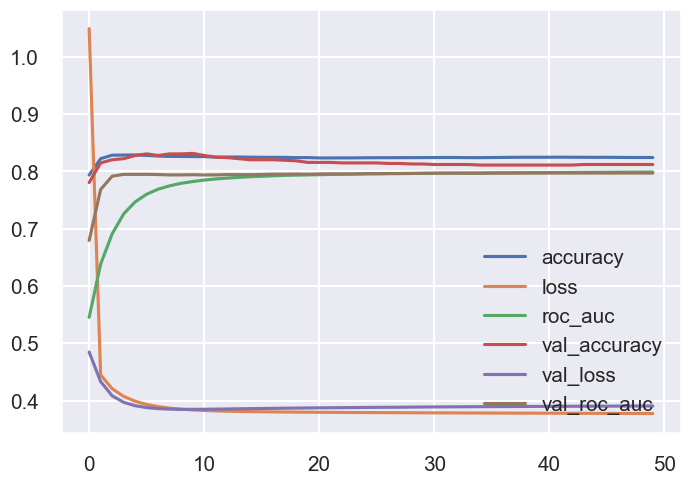

In [149]:
loss_df.plot()
plt.show();


# overfit 

In [150]:
base_model.evaluate(X_test_dl, y_test, verbose=2)
# [loss, accuracy, roc_auc]

38/38 - 0s - 5ms/step - accuracy: 0.8108 - loss: 0.3612 - roc_auc: 0.8452


[0.36118268966674805, 0.8108333349227905, 0.845177412033081]

In [151]:
from sklearn.metrics import confusion_matrix, classification_report

# --- Test set ---
y_pred_test = (base_model.predict(X_test_dl, verbose=0) > 0.5).astype(int)
print("=== TEST ===")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits=4))

# --- Train set ---
y_pred_train = (base_model.predict(X_train_dl, verbose=0) > 0.5).astype(int)
print("\n=== TRAIN ===")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits=4))

=== TEST ===
[[927  74]
 [153  46]]
              precision    recall  f1-score   support

           0     0.8583    0.9261    0.8909      1001
           1     0.3833    0.2312    0.2884       199

    accuracy                         0.8108      1200
   macro avg     0.6208    0.5786    0.5897      1200
weighted avg     0.7796    0.8108    0.7910      1200


=== TRAIN ===
[[7521  577]
 [1184  429]]
              precision    recall  f1-score   support

           0     0.8640    0.9287    0.8952      8098
           1     0.4264    0.2660    0.3276      1613

    accuracy                         0.8187      9711
   macro avg     0.6452    0.5974    0.6114      9711
weighted avg     0.7913    0.8187    0.8009      9711



In [152]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# --- Preprocess ---
X_train_dl = prep_cv.fit_transform(X_train)
X_val_dl   = prep_cv.transform(X_val)
X_test_dl  = prep_cv.transform(X_test)
n_features = X_train_dl.shape[1]

# --- Model ---
model_dl = tf.keras.Sequential([
    layers.Input(shape=(n_features,)),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# --- Compile ---
optimizer = optimizers.Adam(learning_rate=0.001)

model_dl.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.AUC(name='pr_auc', curve='PR'),
        tf.keras.metrics.AUC(name='roc_auc', curve='ROC')
    ]
)

# --- Class weights (handle imbalance) ---
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weights = dict(enumerate(class_weights))

# --- EarlyStopping based on PR AUC ---
early_stop = callbacks.EarlyStopping(
    monitor='val_pr_auc',
    mode='max',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# --- Train ---
history = model_dl.fit(
    X_train_dl, y_train,
    validation_data=(X_val_dl, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=2
)


Epoch 1/100
304/304 - 6s - 20ms/step - loss: 0.5091 - pr_auc: 0.5141 - roc_auc: 0.8349 - val_loss: 0.4638 - val_pr_auc: 0.7337 - val_roc_auc: 0.9005
Epoch 2/100
304/304 - 4s - 12ms/step - loss: 0.3519 - pr_auc: 0.7112 - roc_auc: 0.9239 - val_loss: 0.6637 - val_pr_auc: 0.7649 - val_roc_auc: 0.9054
Epoch 3/100
304/304 - 4s - 12ms/step - loss: 0.3268 - pr_auc: 0.7666 - roc_auc: 0.9346 - val_loss: 0.8388 - val_pr_auc: 0.7132 - val_roc_auc: 0.8815
Epoch 4/100
304/304 - 4s - 12ms/step - loss: 0.3071 - pr_auc: 0.7828 - roc_auc: 0.9415 - val_loss: 0.6210 - val_pr_auc: 0.7417 - val_roc_auc: 0.9197
Epoch 5/100
304/304 - 4s - 12ms/step - loss: 0.2913 - pr_auc: 0.8035 - roc_auc: 0.9472 - val_loss: 0.4778 - val_pr_auc: 0.7735 - val_roc_auc: 0.9311
Epoch 6/100
304/304 - 4s - 12ms/step - loss: 0.2760 - pr_auc: 0.8104 - roc_auc: 0.9522 - val_loss: 0.3254 - val_pr_auc: 0.7265 - val_roc_auc: 0.9224
Epoch 7/100
304/304 - 4s - 12ms/step - loss: 0.2697 - pr_auc: 0.8222 - roc_auc: 0.9544 - val_loss: 0.5241 

In [153]:
proba = model_dl.predict(X_test_dl, verbose=0).ravel()
pred  = (proba >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("=== TEST ===")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=4))

=== TEST ===
[[940  61]
 [  9 190]]
              precision    recall  f1-score   support

           0     0.9905    0.9391    0.9641      1001
           1     0.7570    0.9548    0.8444       199

    accuracy                         0.9417      1200
   macro avg     0.8737    0.9469    0.9043      1200
weighted avg     0.9518    0.9417    0.9443      1200



In [154]:
loss_df = pd.DataFrame(model_dl.history.history)
loss_df.head()

loss    pr_auc   roc_auc  val_loss  val_pr_auc  val_roc_auc
0  0.509080  0.514122  0.834874  0.463821    0.733733     0.900530
1  0.351948  0.711244  0.923938  0.663748    0.764874     0.905372
2  0.326823  0.766639  0.934597  0.838754    0.713179     0.881494
3  0.307062  0.782777  0.941467  0.621030    0.741748     0.919667
4  0.291264  0.803480  0.947228  0.477839    0.773502     0.931070

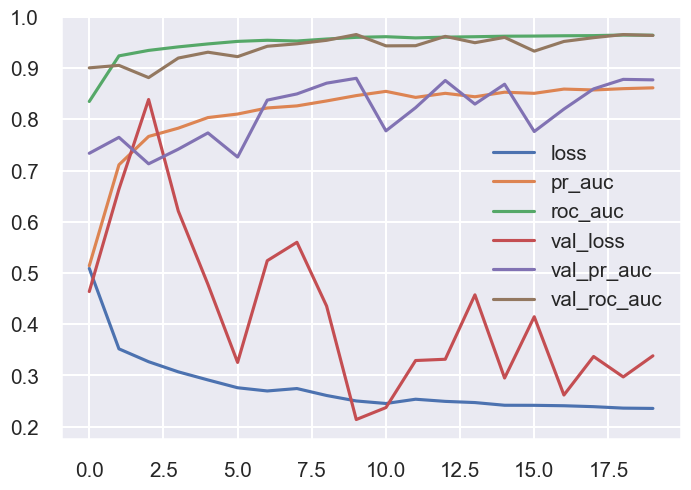

In [155]:
loss_df.plot()
plt.show()

In [157]:
# Save your trained Keras model (change 'final_model' to your model variable if needed)
model_dl.save("saved_models/model_dl.keras")
print("✅ final_model saved to models/final_model.keras")


✅ final_model saved to models/final_model.keras


### optuna

In [83]:
# Optuna ile Keras MLP hiperparametre optimizasyonu (imbalanced veri için PR AUC)
# -------------------------------------------------------------------------------
# Gerekenler: prep_cv, X_train/X_val/X_test, y_train/y_val/y_test hazır olmalı.

import numpy as np
import optuna
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    precision_recall_curve, auc, classification_report, confusion_matrix
)

# 1) Preprocess (DL için OHE + numerikler)
X_train_dl = prep_cv.fit_transform(X_train)
X_val_dl   = prep_cv.transform(X_val)
X_test_dl  = prep_cv.transform(X_test)

# 2) Class weights (dengesiz veri)
classes = np.unique(y_train)
class_weights_arr = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = {int(c): float(w) for c, w in zip(classes, class_weights_arr)}

# 3) Model kurucu (uyarılar fix: Input layer + optimizer string mapping)
def create_model(trial):
    n_units1 = trial.suggest_int("n_units1", 32, 256)
    n_units2 = trial.suggest_int("n_units2", 32, 256)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    optimizer_str = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "Nadam"])
    opt_map = {"Adam": Adam, "RMSprop": RMSprop, "Nadam": Nadam}
    optimizer = opt_map[optimizer_str](learning_rate=learning_rate)

    model = Sequential([
        layers.Input(shape=(X_train_dl.shape[1],)),
        layers.Dense(n_units1, activation="relu"),
        layers.Dense(n_units2, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ])
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=[tf.keras.metrics.AUC(name="pr_auc", curve="PR")]  # PR AUC odak
    )
    return model

# 4) Objective (EarlyStopping: val_pr_auc)
def objective(trial):
    model = create_model(trial)
    early_stop = EarlyStopping(
        monitor="val_pr_auc", mode="max", patience=10, restore_best_weights=True, verbose=0
    )
    model.fit(
        X_train_dl, y_train,
        validation_data=(X_val_dl, y_val),
        epochs=100,
        batch_size=64,
        callbacks=[early_stop],
        class_weight=class_weights,
        verbose=0
    )
    # Keras evaluate 2. değer = pr_auc (loss, pr_auc)
    _, val_pr_auc = model.evaluate(X_val_dl, y_val, verbose=0)
    return float(val_pr_auc)

# 5) Çalıştır
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, catch=(Exception,))
print("Best params:", study.best_params)
print("Best val PR AUC:", study.best_value)

# 6) En iyi parametrelerle final modeli yeniden eğit ve TEST'te değerlendir
best = study.best_params
opt_map = {"Adam": Adam, "RMSprop": RMSprop, "Nadam": Nadam}
final_model = Sequential([
    layers.Input(shape=(X_train_dl.shape[1],)),
    layers.Dense(best["n_units1"], activation="relu"),
    layers.Dense(best["n_units2"], activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])
final_model.compile(
    optimizer=opt_map[best["optimizer"]](learning_rate=best["learning_rate"]),
    loss="binary_crossentropy",
    metrics=[tf.keras.metrics.AUC(name="pr_auc", curve="PR"),
             tf.keras.metrics.AUC(name="roc_auc", curve="ROC")]
)
early_stop = EarlyStopping(
    monitor="val_pr_auc", mode="max", patience=10, restore_best_weights=True, verbose=1
)
final_model.fit(
    X_train_dl, y_train,
    validation_data=(X_val_dl, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=2
)


[I 2025-09-12 12:56:29,729] A new study created in memory with name: no-name-99377f43-1022-41e8-b203-40742ba81ced
[I 2025-09-12 12:56:47,016] Trial 0 finished with value: 0.22647547721862793 and parameters: {'n_units1': 169, 'n_units2': 229, 'learning_rate': 0.0036451538781189343, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 0.22647547721862793.
[I 2025-09-12 12:59:08,693] Trial 1 finished with value: 0.3467264771461487 and parameters: {'n_units1': 126, 'n_units2': 219, 'learning_rate': 7.966134876979584e-05, 'optimizer': 'Nadam'}. Best is trial 1 with value: 0.3467264771461487.
[I 2025-09-12 12:59:46,764] Trial 2 finished with value: 0.33725905418395996 and parameters: {'n_units1': 33, 'n_units2': 248, 'learning_rate': 0.000770123468572907, 'optimizer': 'RMSprop'}. Best is trial 1 with value: 0.3467264771461487.
[I 2025-09-12 12:59:58,242] Trial 3 finished with value: 0.35494154691696167 and parameters: {'n_units1': 152, 'n_units2': 253, 'learning_rate': 0.001378527403524682, 

Best params: {'n_units1': 200, 'n_units2': 155, 'learning_rate': 0.00989073626394291, 'optimizer': 'Adam'}
Best val PR AUC: 0.3888339400291443
Epoch 1/100
152/152 - 3s - 18ms/step - loss: 10.5546 - pr_auc: 0.1711 - roc_auc: 0.5078 - val_loss: 2.3460 - val_pr_auc: 0.1657 - val_roc_auc: 0.5000
Epoch 2/100
152/152 - 1s - 8ms/step - loss: 6.3114 - pr_auc: 0.1734 - roc_auc: 0.5176 - val_loss: 0.4765 - val_pr_auc: 0.2374 - val_roc_auc: 0.6125
Epoch 3/100
152/152 - 1s - 8ms/step - loss: 9.1128 - pr_auc: 0.1678 - roc_auc: 0.5038 - val_loss: 5.4623 - val_pr_auc: 0.1657 - val_roc_auc: 0.5000
Epoch 4/100
152/152 - 1s - 8ms/step - loss: 7.2789 - pr_auc: 0.1676 - roc_auc: 0.5030 - val_loss: 0.4826 - val_pr_auc: 0.2181 - val_roc_auc: 0.6280
Epoch 5/100
152/152 - 1s - 8ms/step - loss: 3.7232 - pr_auc: 0.1774 - roc_auc: 0.5286 - val_loss: 1.9438 - val_pr_auc: 0.2214 - val_roc_auc: 0.5974
Epoch 6/100
152/152 - 1s - 8ms/step - loss: 3.7886 - pr_auc: 0.1850 - roc_auc: 0.5389 - val_loss: 0.5056 - val_pr_a

In [84]:

# 7) Test PR/ROC ve rapor
proba = final_model.predict(X_test_dl, verbose=0).ravel()
# PR eğrisi ve AUC
prec, rec, _ = precision_recall_curve(y_test, proba)
pr_auc_test = auc(rec, prec)
print(f"TEST PR AUC: {pr_auc_test:.4f}")

# İstenirse 0.5 eşik ile rapor
yhat = (proba >= 0.5).astype(int)
print("=== TEST Confusion Matrix ===")
print(confusion_matrix(y_test, yhat))
print("=== TEST Classification Report ===")
print(classification_report(y_test, yhat, digits=4))


TEST PR AUC: 0.3509
=== TEST Confusion Matrix ===
[[592 409]
 [ 29 170]]
=== TEST Classification Report ===
              precision    recall  f1-score   support

           0     0.9533    0.5914    0.7300      1001
           1     0.2936    0.8543    0.4370       199

    accuracy                         0.6350      1200
   macro avg     0.6235    0.7228    0.5835      1200
weighted avg     0.8439    0.6350    0.6814      1200



In [86]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report,
    average_precision_score, roc_auc_score
)

# --- Eşik seçimi: Eğer val'den türetilmiş best_thr değişkenin varsa onu kullan; yoksa 0.5 ---
thr = best_thr if 'best_thr' in globals() else 0.5
print(f"Using threshold: {thr:.4f}")

# --- Train ---
proba_tr = final_model.predict(X_train_dl, verbose=0).ravel()
yhat_tr  = (proba_tr >= thr).astype(int)

print("\n=== TRAIN ===")
print(f"PR AUC: {average_precision_score(y_train, proba_tr):.4f} | ROC AUC: {roc_auc_score(y_train, proba_tr):.4f}")
print(confusion_matrix(y_train, yhat_tr))
print(classification_report(y_train, yhat_tr, digits=4))

# --- Test ---
proba_te = final_model.predict(X_test_dl, verbose=0).ravel()
yhat_te  = (proba_te >= thr).astype(int)

print("\n=== TEST ===")
print(f"PR AUC: {average_precision_score(y_test, proba_te):.4f} | ROC AUC: {roc_auc_score(y_test, proba_te):.4f}")
print(confusion_matrix(y_test, yhat_te))
print(classification_report(y_test, yhat_te, digits=4))


Using threshold: 0.5000

=== TRAIN ===
PR AUC: 0.3726 | ROC AUC: 0.7974
[[4755 3343]
 [ 200 1413]]
              precision    recall  f1-score   support

           0     0.9596    0.5872    0.7286      8098
           1     0.2971    0.8760    0.4437      1613

    accuracy                         0.6352      9711
   macro avg     0.6284    0.7316    0.5861      9711
weighted avg     0.8496    0.6352    0.6813      9711


=== TEST ===
PR AUC: 0.3535 | ROC AUC: 0.7842
[[592 409]
 [ 29 170]]
              precision    recall  f1-score   support

           0     0.9533    0.5914    0.7300      1001
           1     0.2936    0.8543    0.4370       199

    accuracy                         0.6350      1200
   macro avg     0.6235    0.7228    0.5835      1200
weighted avg     0.8439    0.6350    0.6814      1200



In [88]:
os.makedirs("models", exist_ok=True)

model_name = "final_model"
model_dl.save(f"models/{model_name}.keras")
print(f"✅ {model_name} saved to models/{model_name}.keras")

✅ final_model saved to models/final_model.keras


In [ ]:
# SAVE the models



import joblib, os
os.makedirs("saved_models", exist_ok=True)

# All your best pipelines
models = {
    "knn_best_pipe": best_knn_pipe,
    "rf_best_pipe": rf_best_pipe,
    "dt_best_pipe": dt_best_pipe,
    "dt_pruned_pipe": dt_pruned_pipe,
    "ada_best_pipe": best_ada_pipe,
    "gb_best_pipe": gb_best_pipe,
    "xgb_best_pipe": xgb_best_pipe
}

# Save each model
for name, model in models.items():
    filepath = f"saved_models/{name}.joblib"
    joblib.dump(model, filepath)
    print(f"✅ {name} saved to {filepath}")

##### 4.3.1.1 Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [162]:

from deepchecks.tabular.suites import model_evaluation
from deepchecks.tabular import Dataset

# 1) Prepare train and test DataFrames with label column
train_df = X_train.copy()
train_df['left'] = y_train

test_df = X_test.copy()
test_df['left'] = y_test

# 2) Create Deepchecks Dataset objects
train_ds = Dataset(train_df, label='left', cat_features=cat_cols, label_type='binary')
test_ds  = Dataset(test_df,  label='left', cat_features=cat_cols, label_type='binary')

# 3) Choose your best model pipeline (e.g., GradientBoost)
gbr = gb_best_pipe  # or xgb_best_pipe, rf_best_pipe, etc.

# 4) Run the Model Evaluation suite
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, gbr)

# 5) Show and/or save the result
suite_result.show()  # interactive in notebook
suite_result.save_as_html('deepchecks_model_evaluation.html')  # output file
print("Saved to deepchecks_model_evaluation.html")

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 2 seconds
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FGYJTLD4YMYR8BHF9QM30BHDP">Model Evaluation S…

Saved to deepchecks_model_evaluation.html


#### 4.3.2. Compare Models Performances
- Compare model performances according to metrics you choose for the problem.

In [158]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    f1_score, recall_score, precision_score, accuracy_score,
    roc_auc_score, average_precision_score
)

models = {
    "kNN (best_knn_pipe)": best_knn_pipe,
    "RandomForest (rf_best_pipe)": rf_best_pipe,
    "DecisionTree (dt_best_pipe)": dt_best_pipe,
    "DecisionTree-Pruned (dt_pruned_pipe)": dt_pruned_pipe,
    "AdaBoost (best_ada_pipe)": best_ada_pipe,
    "GradientBoost (gb_best_pipe)": gb_best_pipe,
    "XGBoost (xgb_best_pipe)": xgb_best_pipe,
}

def _scores_for_curves(m, X):
    if hasattr(m, "predict_proba"):
        return m.predict_proba(X)[:, 1]
    elif hasattr(m, "decision_function"):
        return m.decision_function(X)
    return None

def build_compare(models, X_test, y_test, thr=0.5):
    rows = []
    for name, m in models.items():
        s = _scores_for_curves(m, X_test)
        if s is None:
            y_pred = m.predict(X_test)
            rocauc = np.nan
            prauc  = np.nan
        else:
            y_pred = (s >= thr).astype(int)
            rocauc = roc_auc_score(y_test, s)
            prauc  = average_precision_score(y_test, s)
        rows.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "ROC_AUC": rocauc,
            "PR_AUC": prauc
        })
    df = pd.DataFrame(rows)
    return df

compare = build_compare(models, X_test, y_test, thr=0.5)
display(compare.sort_values("F1", ascending=False))


Model  Accuracy  Precision    Recall  \
1           RandomForest (rf_best_pipe)  0.988333   0.994652  0.934673   
6               XGBoost (xgb_best_pipe)  0.985833   0.969072  0.944724   
5          GradientBoost (gb_best_pipe)  0.983333   0.954315  0.944724   
4              AdaBoost (best_ada_pipe)  0.981667   0.940299  0.949749   
2           DecisionTree (dt_best_pipe)  0.970833   0.890476  0.939698   
3  DecisionTree-Pruned (dt_pruned_pipe)  0.970833   0.890476  0.939698   
0                   kNN (best_knn_pipe)  0.960833   0.861905  0.909548   

         F1   ROC_AUC    PR_AUC  
1  0.963731  0.986757  0.973664  
6  0.956743  0.988286  0.976027  
5  0.949495  0.987073  0.976452  
4  0.945000  0.989385  0.975954  
2  0.914425  0.968968  0.958355  
3  0.914425  0.968968  0.958355  
0  0.885086  0.974819  0.951943

In [ ]:
Model	                                      Accuracy	Precision 	Recall	      F1	      ROC_AUC	PR_AUC
1	RandomForest (rf_best_pipe)	             0.984160	0.983871	0.919598	0.950649	0.980267	0.964866
6	XGBoost (xgb_best_pipe)                	0.981659	0.958549	0.929648	0.943878	0.984012	0.967919
5	GradientBoost (gb_best_pipe)	        0.979992	0.948718	0.929648	0.939086	0.983835	0.968042
4	AdaBoost (best_ada_pipe)	             0.977074	0.931990	0.929648	0.930818	0.982735	0.964274
2	DecisionTree (dt_best_pipe)          	0.964985	0.868545	0.929648	0.898058	0.968828	0.951642
3	DecisionTree-Pruned (dt_pruned_pipe)	0.964985	0.868545	0.929648	0.898058	0.968828	0.951642
0	kNN (best_knn_pipe)	                    0.958316	0.844907	0.917085	0.879518	0.964513	0.925853


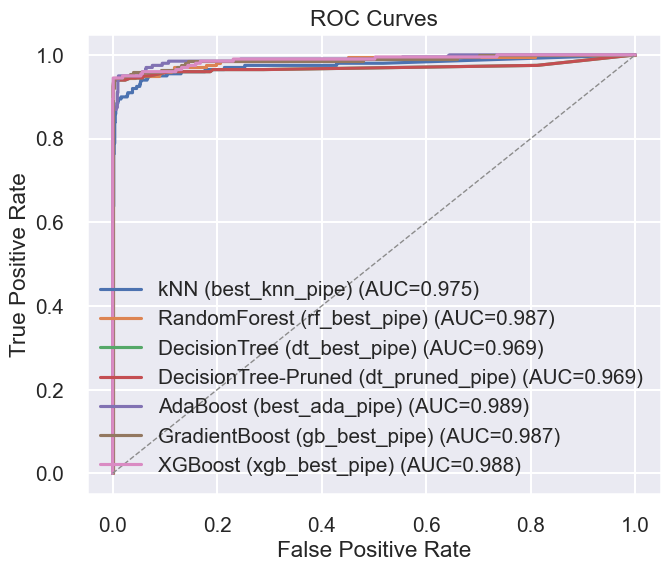

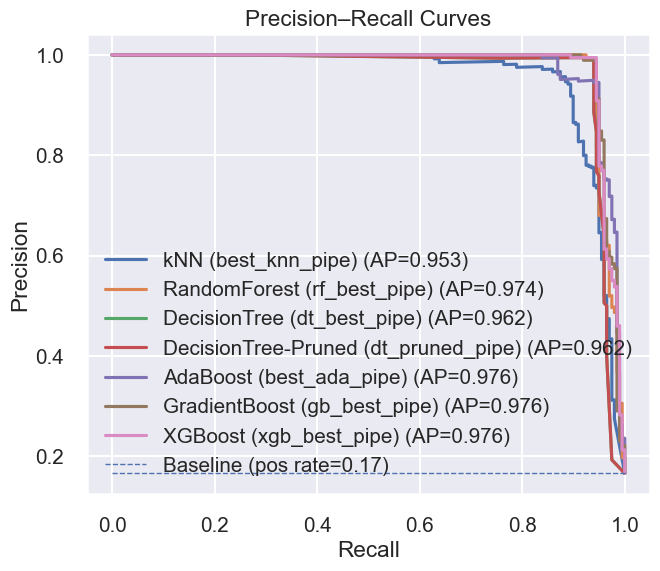

In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

def plot_roc_pr(models, X_test, y_test, max_models=None):
    # İstersen en iyi N modeli seçebilmek için:
    # max_models: None ise hepsi, sayı verirsen ilk o kadar modeli çizer.
    pairs = list(models.items())
    if max_models is not None:
        pairs = pairs[:max_models]

    # --- ROC ---
    plt.figure(figsize=(7, 6))
    for name, m in pairs:
        s = _scores_for_curves(m, X_test)
        if s is None: 
            continue
        fpr, tpr, _ = roc_curve(y_test, s)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'--', linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- PR ---
    plt.figure(figsize=(7, 6))
    # Referans çizgisi: pozitif oranı
    pos_rate = y_test.mean()
    for name, m in pairs:
        s = _scores_for_curves(m, X_test)
        if s is None: 
            continue
        precision, recall, _ = precision_recall_curve(y_test, s)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{name} (AP={pr_auc:.3f})")
    plt.hlines(pos_rate, 0, 1, linestyles="dashed", linewidth=1, label=f"Baseline (pos rate={pos_rate:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curves")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Çalıştır:
plot_roc_pr(models, X_test, y_test)


####  4.3.3 Prediction
- Make a demo prediction

In [160]:

# Combine X_test and y_test for easy filtering
test_df = X_test.copy()
test_df['left'] = y_test.values

# Randomly select 10 with left=0 and 10 with left=1
demo_df = pd.concat([
    test_df[test_df['left'] == 0].sample(10, random_state=42),
    test_df[test_df['left'] == 1].sample(10, random_state=42)
]).reset_index(drop=True)

demo_df

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.49             0.55               4                   268   
1                 0.60             0.87               4                   227   
2                 0.52             0.83               4                   180   
3                 0.54             0.76               5                   226   
4                 0.67             0.66               3                   237   
5                 0.40             0.59               3                   111   
6                 0.16             0.76               5                   192   
7                 0.71             0.60               4                   208   
8                 0.40             0.42               3                   146   
9                 0.67             0.82               4                   246   
10                0.73             1.00               5                   253   
11                0.45             0.48               2                   144   
12                0.80             0.85               4                   264   
13                0.39             0.53               2                   141   
14                0.44             0.49               2                   145   
15                0.90             0.97               4                   258   
16                0.44             0.51               2                   134   
17                0.11             0.96               6                   267   
18                0.43             0.55               2                   136   
19                0.44             0.51               2                   152   

    time_spend_company  work_accident  promotion_last_5years  departments  \
0                    4              0                      0      Support   
1                    3              1                      0    Technical   
2                    2              0                      0      Support   
3                    2              0                      0           IT   
4                    3              0                      0    Marketing   
5                    4              1                      0           IT   
6                    3              0                      0    Technical   
7                    3              0                      0   Accounting   
8                    2              1                      0           HR   
9                    4              0                      0   Accounting   
10                   6              0                      0      Support   
11                   3              0                      0    Marketing   
12                   5              0                      0      Support   
13                   3              0                      0        Sales   
14                   3              0                      0        Sales   
15                   5              0                      0   Accounting   
16                   3              0                      0           HR   
17                   4              0                      0        Sales   
18                   3              0                      0        Sales   
19                   3              0                      0  Product_mng   

    salary  cluster  cluster_3c  left  
0     high        1           1     0  
1   medium        2           2     0  
2   medium        2           2     0  
3      low        2           2     0  
4      low        2           2     0  
5      low        2           2     0  
6   medium        1           1     0  
7     high        2           2     0  
8   medium        2           2     0  
9   medium        1           1     0  
10     low        1           1     1  
11  medium        2           2     1  
12  medium        1           1     1  
13  medium        2           2     1  
14     low        2           2     1  
15     low        1           1     1  
16  

In [161]:
# Load the saved GradientBoost model
import joblib

gb_best_pipe = joblib.load("saved_models/gb_best_pipe.joblib")

# Prepare demo data (drop label column for prediction)
X_demo = demo_df.drop(columns=['left'])

# Predict with GradientBoost
demo_preds = gb_best_pipe.predict(X_demo)
demo_proba = gb_best_pipe.predict_proba(X_demo)[:, 1]

# Add predictions to demo_df
demo_results = demo_df.copy()
demo_results['gb_pred'] = demo_preds
demo_results['gb_proba'] = demo_proba

print(demo_results)

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.49             0.55               4                   268   
1                 0.60             0.87               4                   227   
2                 0.52             0.83               4                   180   
3                 0.54             0.76               5                   226   
4                 0.67             0.66               3                   237   
5                 0.40             0.59               3                   111   
6                 0.16             0.76               5                   192   
7                 0.71             0.60               4                   208   
8                 0.40             0.42               3                   146   
9                 0.67             0.82               4                   246   
10                0.73             1.00               5                   253   
11                0.45      

In [165]:
df


satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11986                0.90             0.55               3   
11987                0.74             0.95               5   
11988                0.85             0.54               3   
11989                0.33             0.65               3   
11990                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years departments  salary  left  cluster  cluster_3c  
0                          0       Sales     low     1        2           2  
1                          0       Sales  medium     1        1           1  
2                          0       Sales  medium     1        1           1  
3                          0       Sales     low     1        1           1  
4                          0       Sales     low     1        2           2  
...                      ...         ...     ...   ...      ...         ...  
11986                      1  Management    high     0        0           0  
11987                      1  Management    high     0        0           0  
11988                      1  Management    high     0        0           0  
11989                      1   Marketing    high     0        0           0  
11990                      0          IT     low     0        2           2  

[11991 rows x 12 columns]

## 5. Model Deployement
- Finalize your model with whole dataset and prepare for the deployment.

### 5.1. Final Model

In [166]:

# saved_models/gb_best_pipe_final.joblib
#                                          gb_best_pipe_final.joblib



# Drop cluster columns before training final model
drop_cols = ['cluster', 'cluster_3c', 'predicted_3clusters']
X_full = df.drop(columns=drop_cols + ['left'], errors='ignore')
y_full = df['left']

# Fit your best pipeline on the entire data (no cluster columns)
gb_best_pipe.fit(X_full, y_full)

# Save the finalized model for deployment
joblib.dump(gb_best_pipe, "saved_models/gb_best_pipe_final.joblib")
print("✅ Final GradientBoost model saved to saved_models/gb_best_pipe_final.joblib")


✅ Final GradientBoost model saved to saved_models/gb_best_pipe_final.joblib


In [167]:
modelllll = joblib.load("saved_models/gb_best_pipe_final.joblib")

# Prepare demo data (drop label column for prediction)
X_demo = demo_df.drop(columns=['left'])

# Predict with GradientBoost
demo_preds = modelllll.predict(X_demo)
demo_proba = modelllll.predict_proba(X_demo)[:, 1]

# Add predictions to demo_df
demo_results = demo_df.copy()
demo_results['gb_pred'] = demo_preds
demo_results['gb_proba'] = demo_proba

print(demo_results)

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.49             0.55               4                   268   
1                 0.60             0.87               4                   227   
2                 0.52             0.83               4                   180   
3                 0.54             0.76               5                   226   
4                 0.67             0.66               3                   237   
5                 0.40             0.59               3                   111   
6                 0.16             0.76               5                   192   
7                 0.71             0.60               4                   208   
8                 0.40             0.42               3                   146   
9                 0.67             0.82               4                   246   
10                0.73             1.00               5                   253   
11                0.45      

### 5.2. Save and Export the Best Model